# ZNEUS Project 1: MLP - Alisa Podolska, Yulian Kisil

Dataset: https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download (57 MB)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  
import warnings
import matplotlib
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

## Data analysis + predprocessing

Reading data

In [2]:
data = pd.read_csv("dataset.csv", sep=',')
data.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
0               2        2              2        2                     3   97  
1               2        1              1        2                     5   97  
2               2        2              2        2                     3    2  
3               2        2              2        2                     7   97  
4               2        2              2        2                     3   97  

[5 rows x 21 columns]

In [3]:
data.rename(columns={'CLASIFFICATION_FINAL': 'CLASSIFICATION_FINAL'}, inplace=True)

Deleting duplicities

In [4]:
duplicates = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
19           2             1    1             1  9999-99-99       97   
35           2             1    2             1  9999-99-99       97   
62           2             1    1             2  9999-99-99        2   
63           2             1    2             1  9999-99-99       97   
75           2             1    1             1  9999-99-99       97   
...        ...           ...  ...           ...         ...      ...   
1048556      2            13    2             1  9999-99-99       97   
1048558      1            13    2             1  9999-99-99       97   
1048566      2            13    2             1  9999-99-99       97   
1048570      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
19               2   64         2         2  ...  

In [5]:
duplicates.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
19      2             1    1             1  9999-99-99       97          2   
35      2             1    2             1  9999-99-99       97          2   
62      2             1    1             2  9999-99-99        2          2   
63      2             1    2             1  9999-99-99       97          2   
75      2             1    1             1  9999-99-99       97          2   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
19   64         2         2  ...       2        2             2   
35   45        97         2  ...       2        2             2   
62   25         2         2  ...       2        2             2   
63   33        97         2  ...       2        2             2   
75   24         2         2  ...       2        2             2   

    OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
19              2               2        2              2        2   
35              2               2        2              2        2   
62              2               2        2              2        2   
63              2               2        2              2        2   
75              2               2        2              2        2   

    CLASSIFICATION_FINAL  ICU  
19                     3   97  
35                     3   97  
62                     7    2  
63                     7   97  
75                     7   97  

[5 rows x 21 columns]

In [6]:
data = data.drop_duplicates()

In [7]:
print(data)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048568      1            13    2             1  9999-99-99       97   
1048569      1            13    1             2  9999-99-99        2   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2 

Detecting missing values

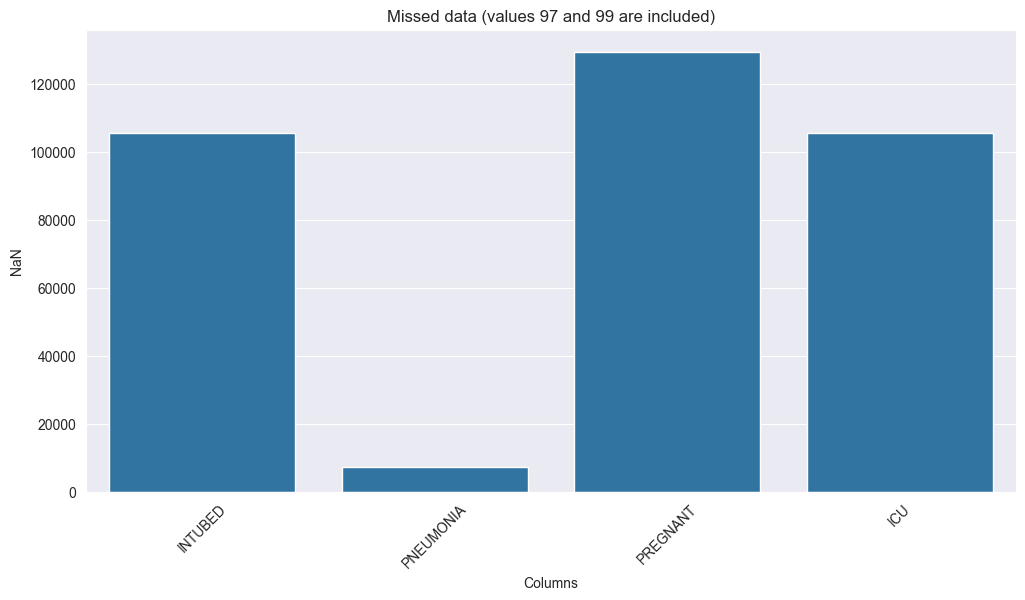

           Total NaN  Percentage NaN
INTUBED       105387       44.556201
PNEUMONIA       7187        3.038567
PREGNANT      129503       54.752120
ICU           105536       44.619196


In [8]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'DATE_DIED' in numeric_cols:
    numeric_cols.remove('DATE_DIED')
if 'AGE' in numeric_cols:
    numeric_cols.remove('AGE')
data[numeric_cols] = data[numeric_cols].replace([97, 99], np.nan)

nan_summary = data.isna().sum()
nan_percentage = (nan_summary / len(data)) * 100
nan_info = pd.DataFrame({'Total NaN': nan_summary, 'Percentage NaN': nan_percentage})
nan_info = nan_info[nan_info['Total NaN'] > 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=nan_info.index, y='Total NaN', data=nan_info)
plt.xticks(rotation=45)
plt.ylabel('NaN')
plt.xlabel('Columns')
plt.title('Missed data (values 97 and 99 are included)')
plt.show()
print(nan_info)

Colums with a lot of missing values (>40%) should be deleted

In [9]:
data = data.dropna(axis=1, thresh=len(data) * 0.6)
print(data)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA  AGE  \
0            2             1    1             1  03/05/2020        1.0   65   
1            2             1    2             1  03/06/2020        1.0   72   
2            2             1    2             2  09/06/2020        2.0   55   
3            2             1    1             1  12/06/2020        2.0   53   
4            2             1    2             1  21/06/2020        2.0   68   
...        ...           ...  ...           ...         ...        ...  ...   
1048568      1            13    2             1  9999-99-99        2.0   47   
1048569      1            13    1             2  9999-99-99        2.0   56   
1048571      1            13    2             2  9999-99-99        2.0   51   
1048572      2            13    2             1  9999-99-99        2.0   55   
1048574      2            13    2             1  9999-99-99        2.0   52   

         DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENS

Lets decide what to do with column where there is not so many missed values

In [10]:
data = data[~data["PNEUMONIA"].isin([97, 99]) & data["PNEUMONIA"].notna()]


In [11]:
data[data['PNEUMONIA'].isna()]['SEX'].value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)

In [12]:
data[data['PNEUMONIA'].isna()]['AGE'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: AGE, dtype: float64

In [13]:
data[data['PNEUMONIA']==1]['AGE'].describe()

count    99730.000000
mean        56.913707
std         17.717090
min          0.000000
25%         46.000000
50%         58.000000
75%         69.000000
max        120.000000
Name: AGE, dtype: float64

In [14]:
data[data['PNEUMONIA']==2]['AGE'].describe()

count    129609.000000
mean         49.853127
std          19.541605
min           0.000000
25%          36.000000
50%          50.000000
75%          64.000000
max         121.000000
Name: AGE, dtype: float64

We can see that mean of column Age with missing values of pneumonia and mean of column Age without pneumonia(value 2) is much more similar than people with pneumonia(value 1).
So to avoid deletion of 7187 records we changed it to values 2.

In [15]:
data['PNEUMONIA'].fillna(2, inplace=True)

Outliers

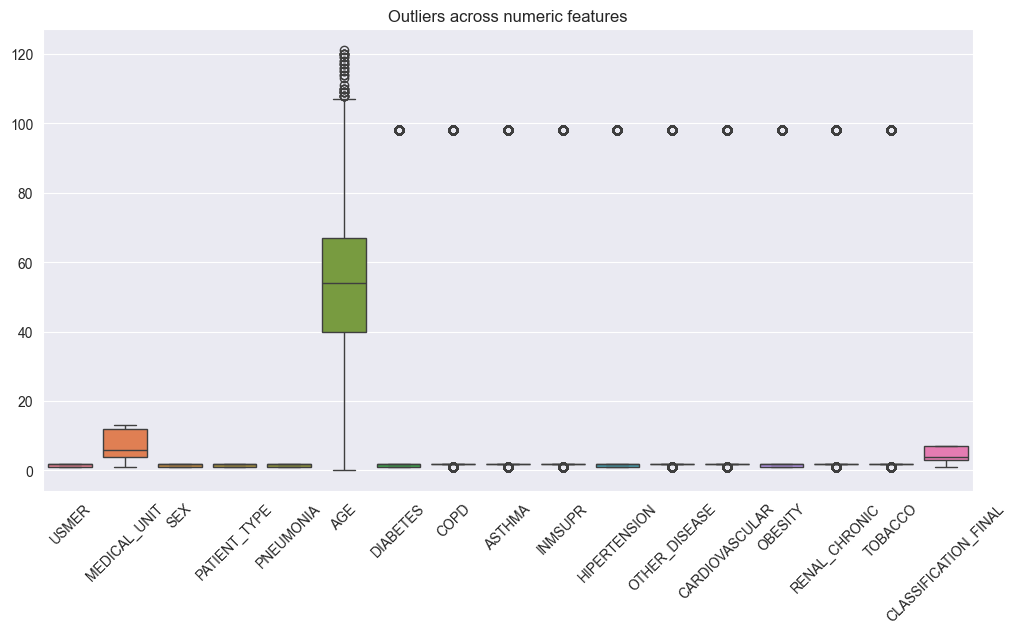

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Outliers across numeric features')
plt.xticks(rotation=45)
plt.show()

Due too data leakage we should delete column: date_died. It is result after out target value. We cannot use it to classify new data.

In [17]:
data = data.drop(columns=['DATE_DIED'])

## Data analysis on cleaned data

In [18]:
print(f"Record count: {data.shape[0]}, Attribute count: {data.shape[1]}\n{data.dtypes}")

Record count: 229339, Attribute count: 17
USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
PNEUMONIA               float64
AGE                       int64
DIABETES                  int64
COPD                      int64
ASTHMA                    int64
INMSUPR                   int64
HIPERTENSION              int64
OTHER_DISEASE             int64
CARDIOVASCULAR            int64
OBESITY                   int64
RENAL_CHRONIC             int64
TOBACCO                   int64
CLASSIFICATION_FINAL      int64
dtype: object


In [19]:
data['PNEUMONIA'] = data['PNEUMONIA'].astype(int)

Lets look on correlation between attributes

<Axes: >

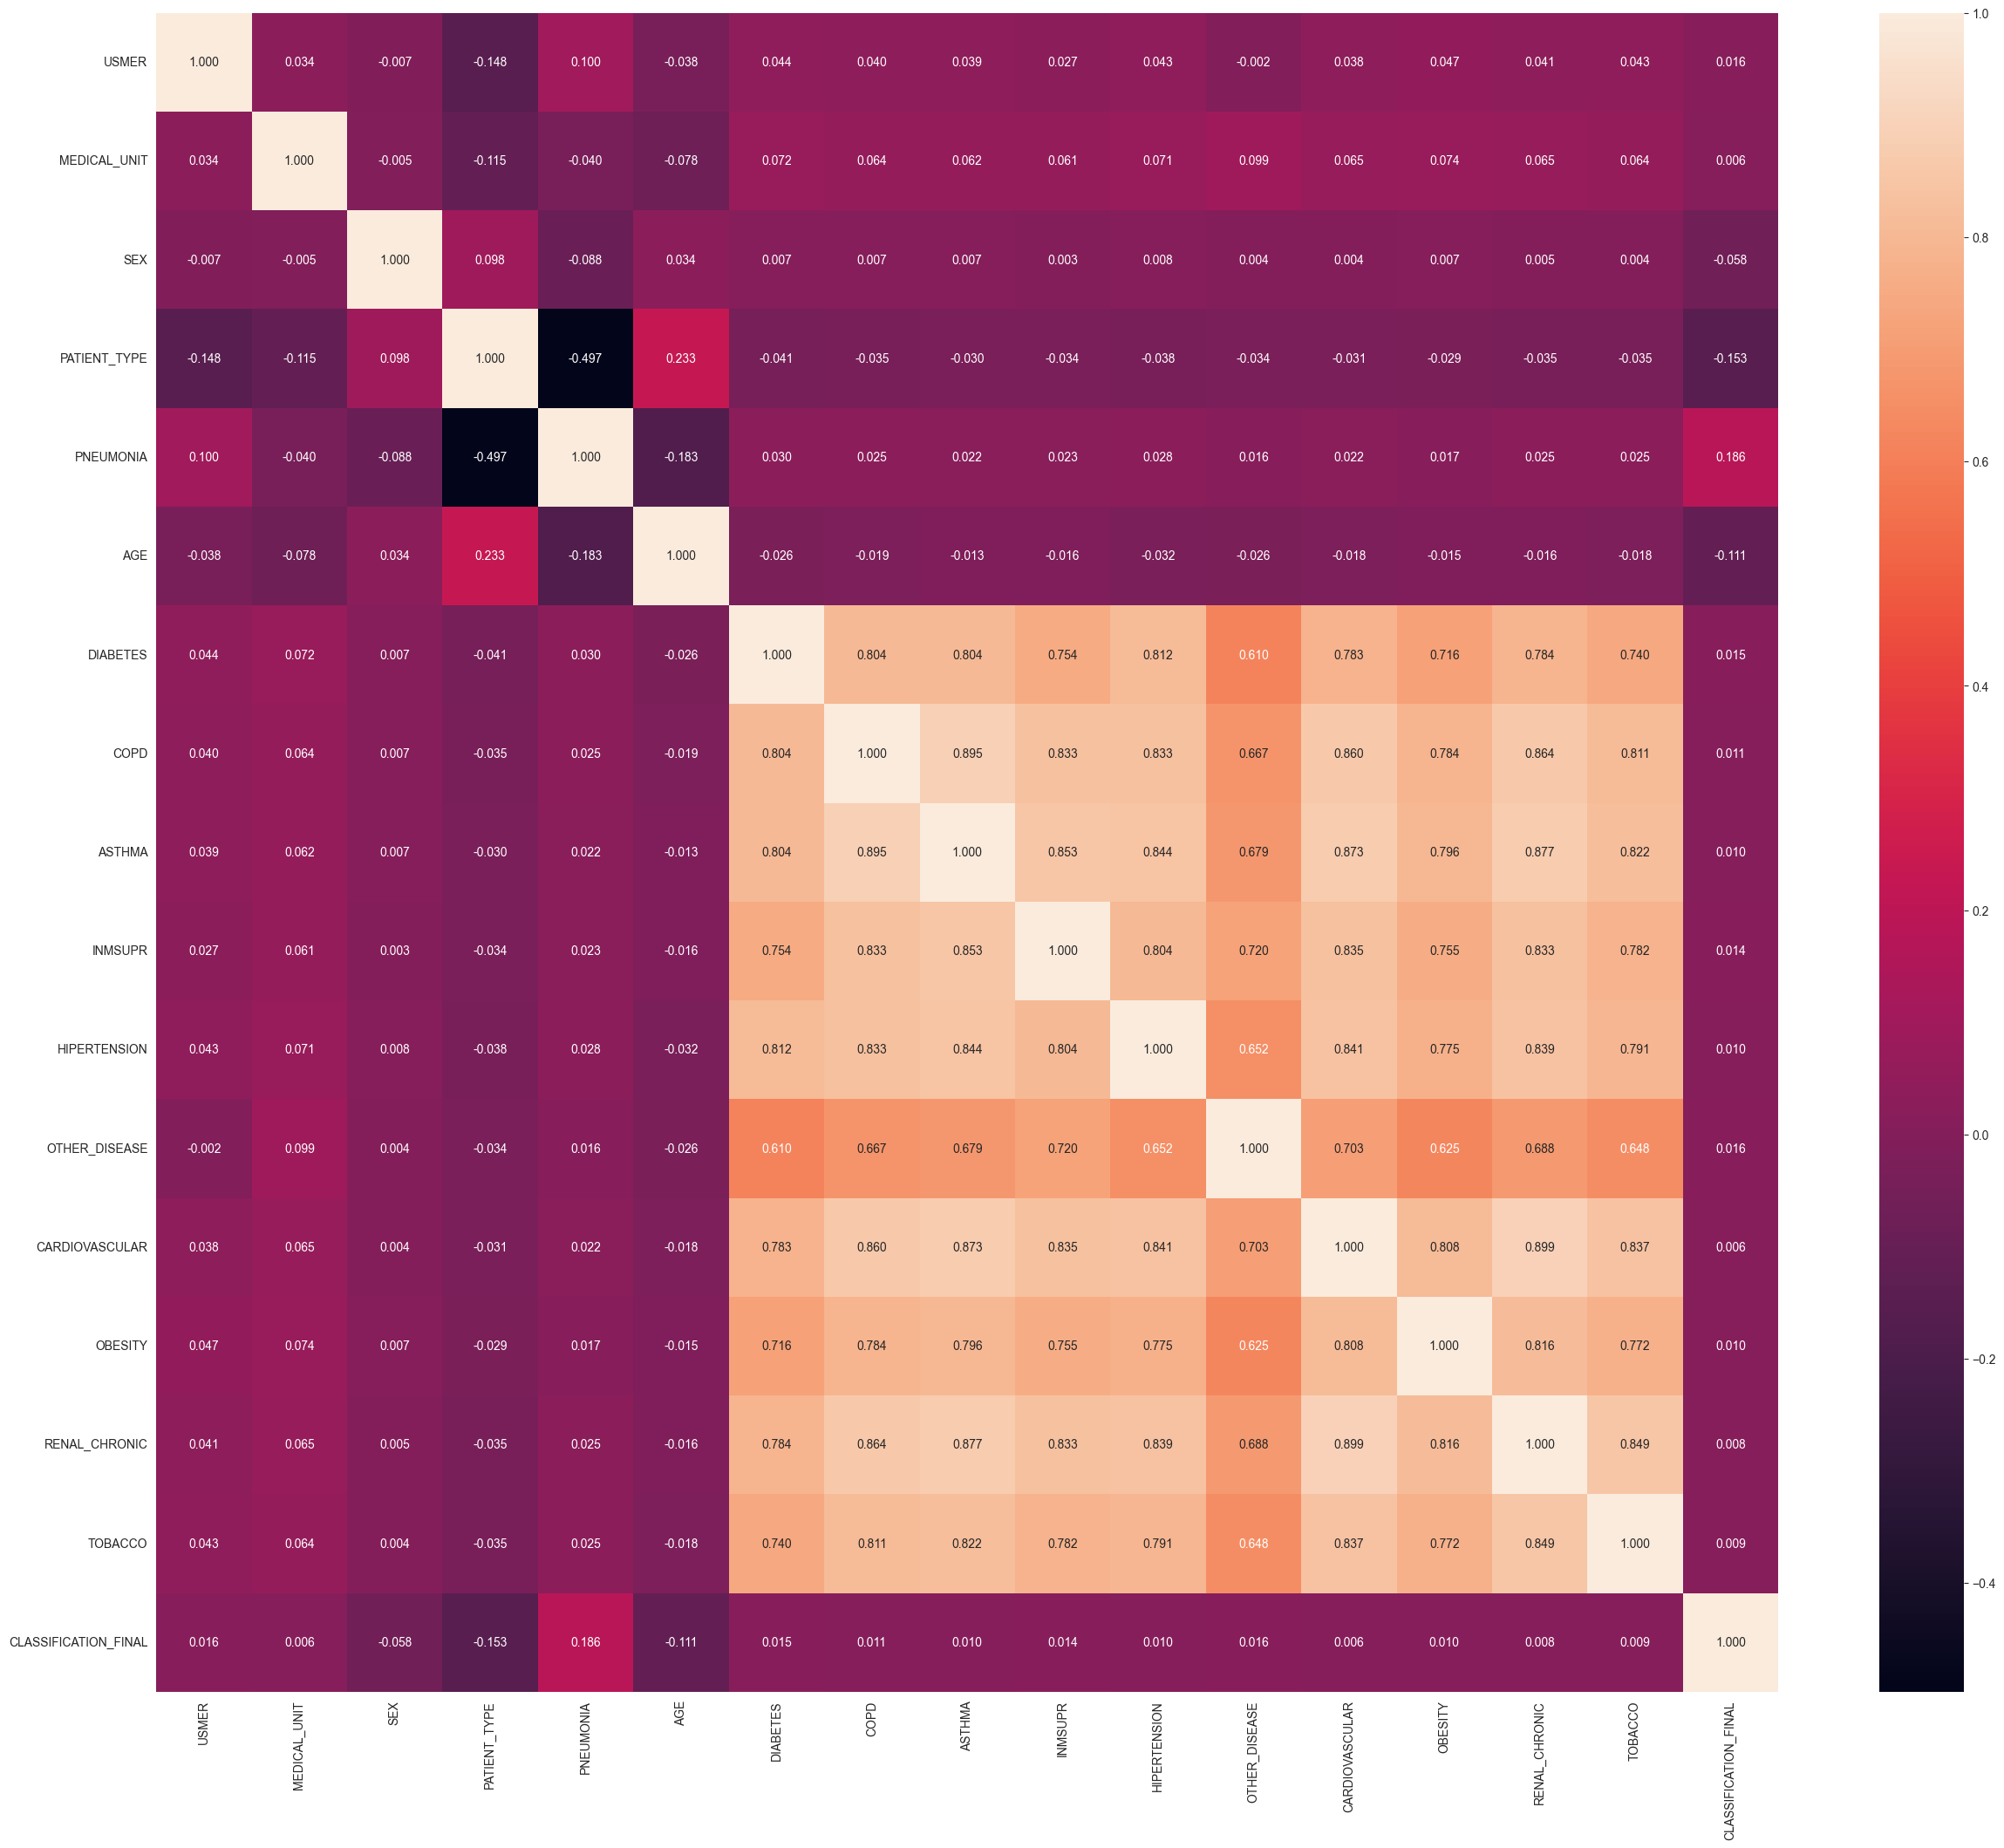

In [20]:
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")

Main attributes (have the biggest dependencies with our target value CLASSIFICATION_FINAL) are: **PNEUMONIA, OTHER_DISEASE, DIABETES, INMSUPR**

**Hypothesis**

Null Hypothesis (**H0**):

The variables age and classification_final are independent.
The presence of age is not associated with the level of patient classification.

Alternative Hypothesis (**H1**):

The variables are dependent.
The presence of age is associated with the level of patient classification.

In [21]:
table = pd.crosstab(data['AGE'], data['CLASSIFICATION_FINAL'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-Square test for AGE")
print(f"Test result {chi2:.3f}, p-value = {p:.5f}, dof = {dof}")
    
if p < 0.05:
    print(f"There IS a significant relationship between AGE and CLASSIFICATION_FINAL.\n")
else:
    print(f"There is NO significant relationship between AGE and CLASSIFICATION_FINAL.\n")

Chi-Square test for AGE
Test result 8656.253, p-value = 0.00000, dof = 720
There IS a significant relationship between AGE and CLASSIFICATION_FINAL.



Based on the results of the Chi-square test, the obtained p-value is less than 0.05.
Therefore, we reject the null hypothesis and accept the alternative hypothesis.
This indicates that there is a statistically significant association between the presence of AGE and the level of patient classification.

**Distribution of column AGE**

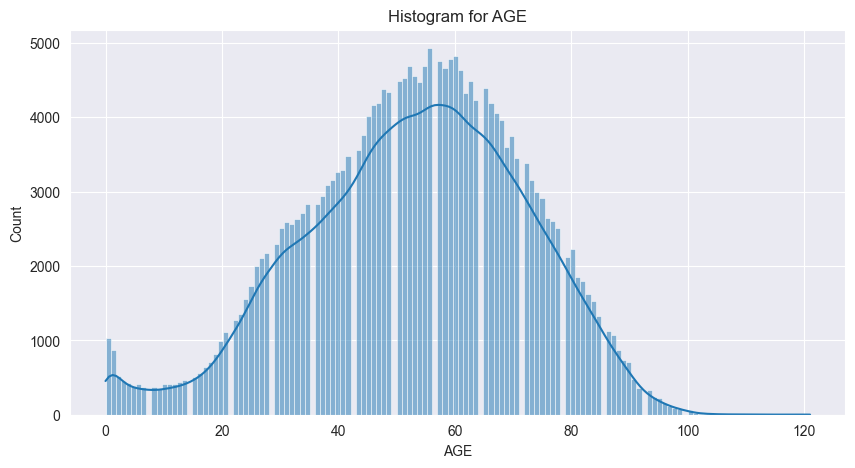

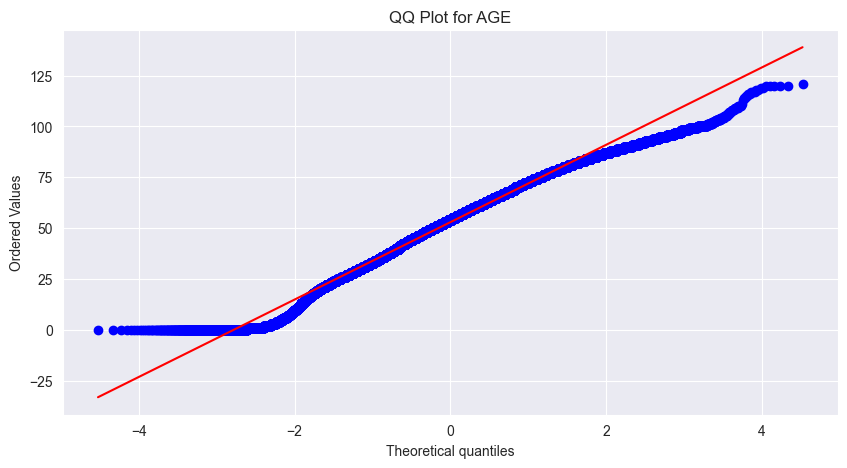

Shapiro-Wilk Test for AGE: Stat=0.991, p-value=0.000
The distribution of AGE is not normal.



In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(data['AGE'], kde=True)
plt.title(f'Histogram for AGE')
plt.show()

plt.figure(figsize=(10, 5))
stats.probplot(data['AGE'], dist="norm", plot=plt)
plt.title(f'QQ Plot for AGE')
plt.show()

stat, p_value = stats.shapiro(data['AGE'])
print(f'Shapiro-Wilk Test for AGE: Stat={stat:.3f}, p-value={p_value:.3f}')
    
if p_value > 0.05:
    print(f'The distribution of AGE is normal.\n')
else:
    print(f'The distribution of AGE is not normal.\n')

In [23]:
data_MC = data.copy()

## Data split

The dataset divided into three parts:

70% for training,

15% for validation,

15% for testing.

In [24]:
X = data.drop(columns=['CLASSIFICATION_FINAL'])
y = data['CLASSIFICATION_FINAL']

In [25]:
val_size = 0.15
test_size = 0.15

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=val_size / (1 - test_size),
    stratify=y_temp, random_state=42
)


## Data normalization

All columns with values 1 and 2 were converted into binary format.

In [26]:
binary_cols = ['PNEUMONIA', 'DIABETES', 'INMSUPR', 'OTHER_DISEASE', 'TOBACCO', 'RENAL_CHRONIC', 'OBESITY', 'CARDIOVASCULAR', 'HIPERTENSION', 'ASTHMA', 'COPD']
data[binary_cols] = data[binary_cols].replace({2: 0})
X_test[binary_cols] = data[binary_cols].replace({2: 0})
X_val[binary_cols] = data[binary_cols].replace({2: 0})
X_train[binary_cols] = data[binary_cols].replace({2: 0})


All categorical features were transformed using one-hot encoding.

In [27]:
categorical_cols = ['SEX', 'PATIENT_TYPE', 'MEDICAL_UNIT']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dtype=int)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True, dtype=int)
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True, dtype=int)


data = data.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_test = X_test.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_val = X_val.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_train = X_train.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})

AGE column was normalized using the Min-Max Scaler.

In [28]:
scaler = MinMaxScaler()
data['AGE'] = scaler.fit_transform(data[['AGE']])
X_test['AGE'] = scaler.fit_transform(X_test[['AGE']])
X_val['AGE'] = scaler.fit_transform(X_val[['AGE']])
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])

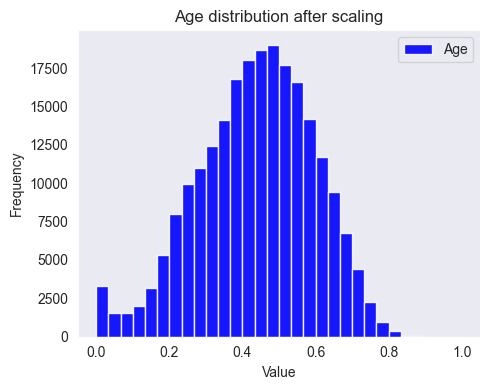

In [29]:
plt.figure(figsize=(5, 4)) 
plt.hist(data['AGE'], bins=30, alpha=0.9, color='blue')
plt.title("Age distribution after scaling")  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(["Age"])
plt.grid()
plt.tight_layout()
plt.show()

Target column is changed 
- 1–3 → 1 (positive COVID test)
- 4–7 → 0 (negative COVID test)

In [30]:
data['CLASSIFICATION_FINAL'] = data['CLASSIFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0)
y_train = y_train.apply(lambda x: 1 if x in [1, 2, 3] else 0)
y_val = y_val.apply(lambda x: 1 if x in [1, 2, 3] else 0)
y_test = y_test.apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [31]:
y_train.head()

140755    1
59453     1
480496    1
741383    0
234507    0
Name: CLASSIFICATION_FINAL, dtype: int64

In [32]:
print(len(y_train))
print(f"Train record count: {X_train.shape[0]}, Attribute count: {X_train.shape[1]}\n{X_train.dtypes}")

160537
Train record count: 160537, Attribute count: 27
USMER                int64
PNEUMONIA            int64
AGE                float64
DIABETES             int64
COPD                 int64
ASTHMA               int64
INMSUPR              int64
HIPERTENSION         int64
OTHER_DISEASE        int64
CARDIOVASCULAR       int64
OBESITY              int64
RENAL_CHRONIC        int64
TOBACCO              int64
IS_MALE              int64
IS_HOSPITALIZED      int64
MEDICAL_UNIT_2       int64
MEDICAL_UNIT_3       int64
MEDICAL_UNIT_4       int64
MEDICAL_UNIT_5       int64
MEDICAL_UNIT_6       int64
MEDICAL_UNIT_7       int64
MEDICAL_UNIT_8       int64
MEDICAL_UNIT_9       int64
MEDICAL_UNIT_10      int64
MEDICAL_UNIT_11      int64
MEDICAL_UNIT_12      int64
MEDICAL_UNIT_13      int64
dtype: object


In [33]:
print(len(y_test))
print(f"Test record count: {X_test.shape[0]}, Attribute count: {X_test.shape[1]}\n{X_test.dtypes}")

34401
Test record count: 34401, Attribute count: 27
USMER                int64
PNEUMONIA            int64
AGE                float64
DIABETES             int64
COPD                 int64
ASTHMA               int64
INMSUPR              int64
HIPERTENSION         int64
OTHER_DISEASE        int64
CARDIOVASCULAR       int64
OBESITY              int64
RENAL_CHRONIC        int64
TOBACCO              int64
IS_MALE              int64
IS_HOSPITALIZED      int64
MEDICAL_UNIT_2       int64
MEDICAL_UNIT_3       int64
MEDICAL_UNIT_4       int64
MEDICAL_UNIT_5       int64
MEDICAL_UNIT_6       int64
MEDICAL_UNIT_7       int64
MEDICAL_UNIT_8       int64
MEDICAL_UNIT_9       int64
MEDICAL_UNIT_10      int64
MEDICAL_UNIT_11      int64
MEDICAL_UNIT_12      int64
MEDICAL_UNIT_13      int64
dtype: object


In [34]:
print(len(y_val))
print(f"Val record count: {X_val.shape[0]}, Attribute count: {X_val.shape[1]}\n{X_val.dtypes}")

34401
Val record count: 34401, Attribute count: 27
USMER                int64
PNEUMONIA            int64
AGE                float64
DIABETES             int64
COPD                 int64
ASTHMA               int64
INMSUPR              int64
HIPERTENSION         int64
OTHER_DISEASE        int64
CARDIOVASCULAR       int64
OBESITY              int64
RENAL_CHRONIC        int64
TOBACCO              int64
IS_MALE              int64
IS_HOSPITALIZED      int64
MEDICAL_UNIT_2       int64
MEDICAL_UNIT_3       int64
MEDICAL_UNIT_4       int64
MEDICAL_UNIT_5       int64
MEDICAL_UNIT_6       int64
MEDICAL_UNIT_7       int64
MEDICAL_UNIT_8       int64
MEDICAL_UNIT_9       int64
MEDICAL_UNIT_10      int64
MEDICAL_UNIT_11      int64
MEDICAL_UNIT_12      int64
MEDICAL_UNIT_13      int64
dtype: object


In [35]:
data

USMER  PNEUMONIA       AGE  DIABETES  COPD  ASTHMA  INMSUPR  \
0            2          1  0.537190         0     0       0        0   
1            2          1  0.595041         0     0       0        0   
2            2          0  0.454545         1     0       0        0   
3            2          0  0.438017         0     0       0        0   
4            2          0  0.561983         1     0       0        0   
...        ...        ...       ...       ...   ...     ...      ...   
1048568      1          0  0.388430         1     0       0        0   
1048569      1          0  0.462810         1     0       0        0   
1048571      1          0  0.421488         0     0       0        0   
1048572      2          0  0.454545         0     0       0        0   
1048574      2          0  0.429752         0     0       0        0   

         HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  ...  MEDICAL_UNIT_4  \
0                   1              0               0  ...               0   
1                   1              0               0  ...               0   
2                   0              0               0  ...               0   
3                   0              0               0  ...               0   
4                   1              0               0  ...               0   
...               ...            ...             ...  ...             ...   
1048568             0              0               0  ...               0   
1048569             0              0               0  ...               0   
1048571             1              0               0  ...               0   
1048572             0              0               0  ...               0   
1048574             0              0               0  ...               0   

         MEDICAL_UNIT_5  MEDICAL_UNIT_6  MEDICAL_UNIT_7  MEDICAL_UNIT_8  \
0                     0               0               0               0   
1                     0               0               0               0   
2                     0               0               0               0   
3                     0               0               0               0   
4                     0               0               0               0   
...                 ...             ...             ...             ...   
1048568               0               0               0               0   
1048569               0               0               0               0   
1048571               0               0               0               0   
1048572               0               0               0               0   
1048574               0               0               0               0   

         MEDICAL_UNIT_9  MEDICAL_UNIT_10  MEDICAL_UNIT_11  MEDICAL_UNIT_12  \
0                     0                0                0                0   
1                     0                0                0                0   
2                     0                0                0                0   
3                     0                0                0                0   
4                     0                0                0                0   
...                 ...              ...              ...              ...   
1048568               0                0                0                0   
1048569               0                0                0                0   
1048571               0                0                0                0   
1048572               0                0                0                0   
1048574               0                0                0                0   

         MEDICAL_UNIT_13  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
1048568                1  
1048569                1  
1048571                1  
1048572                1  
1048574                1  

[229339 rows x 28 columns]

Lets look on correlation between attributes on normalized data

<Axes: >

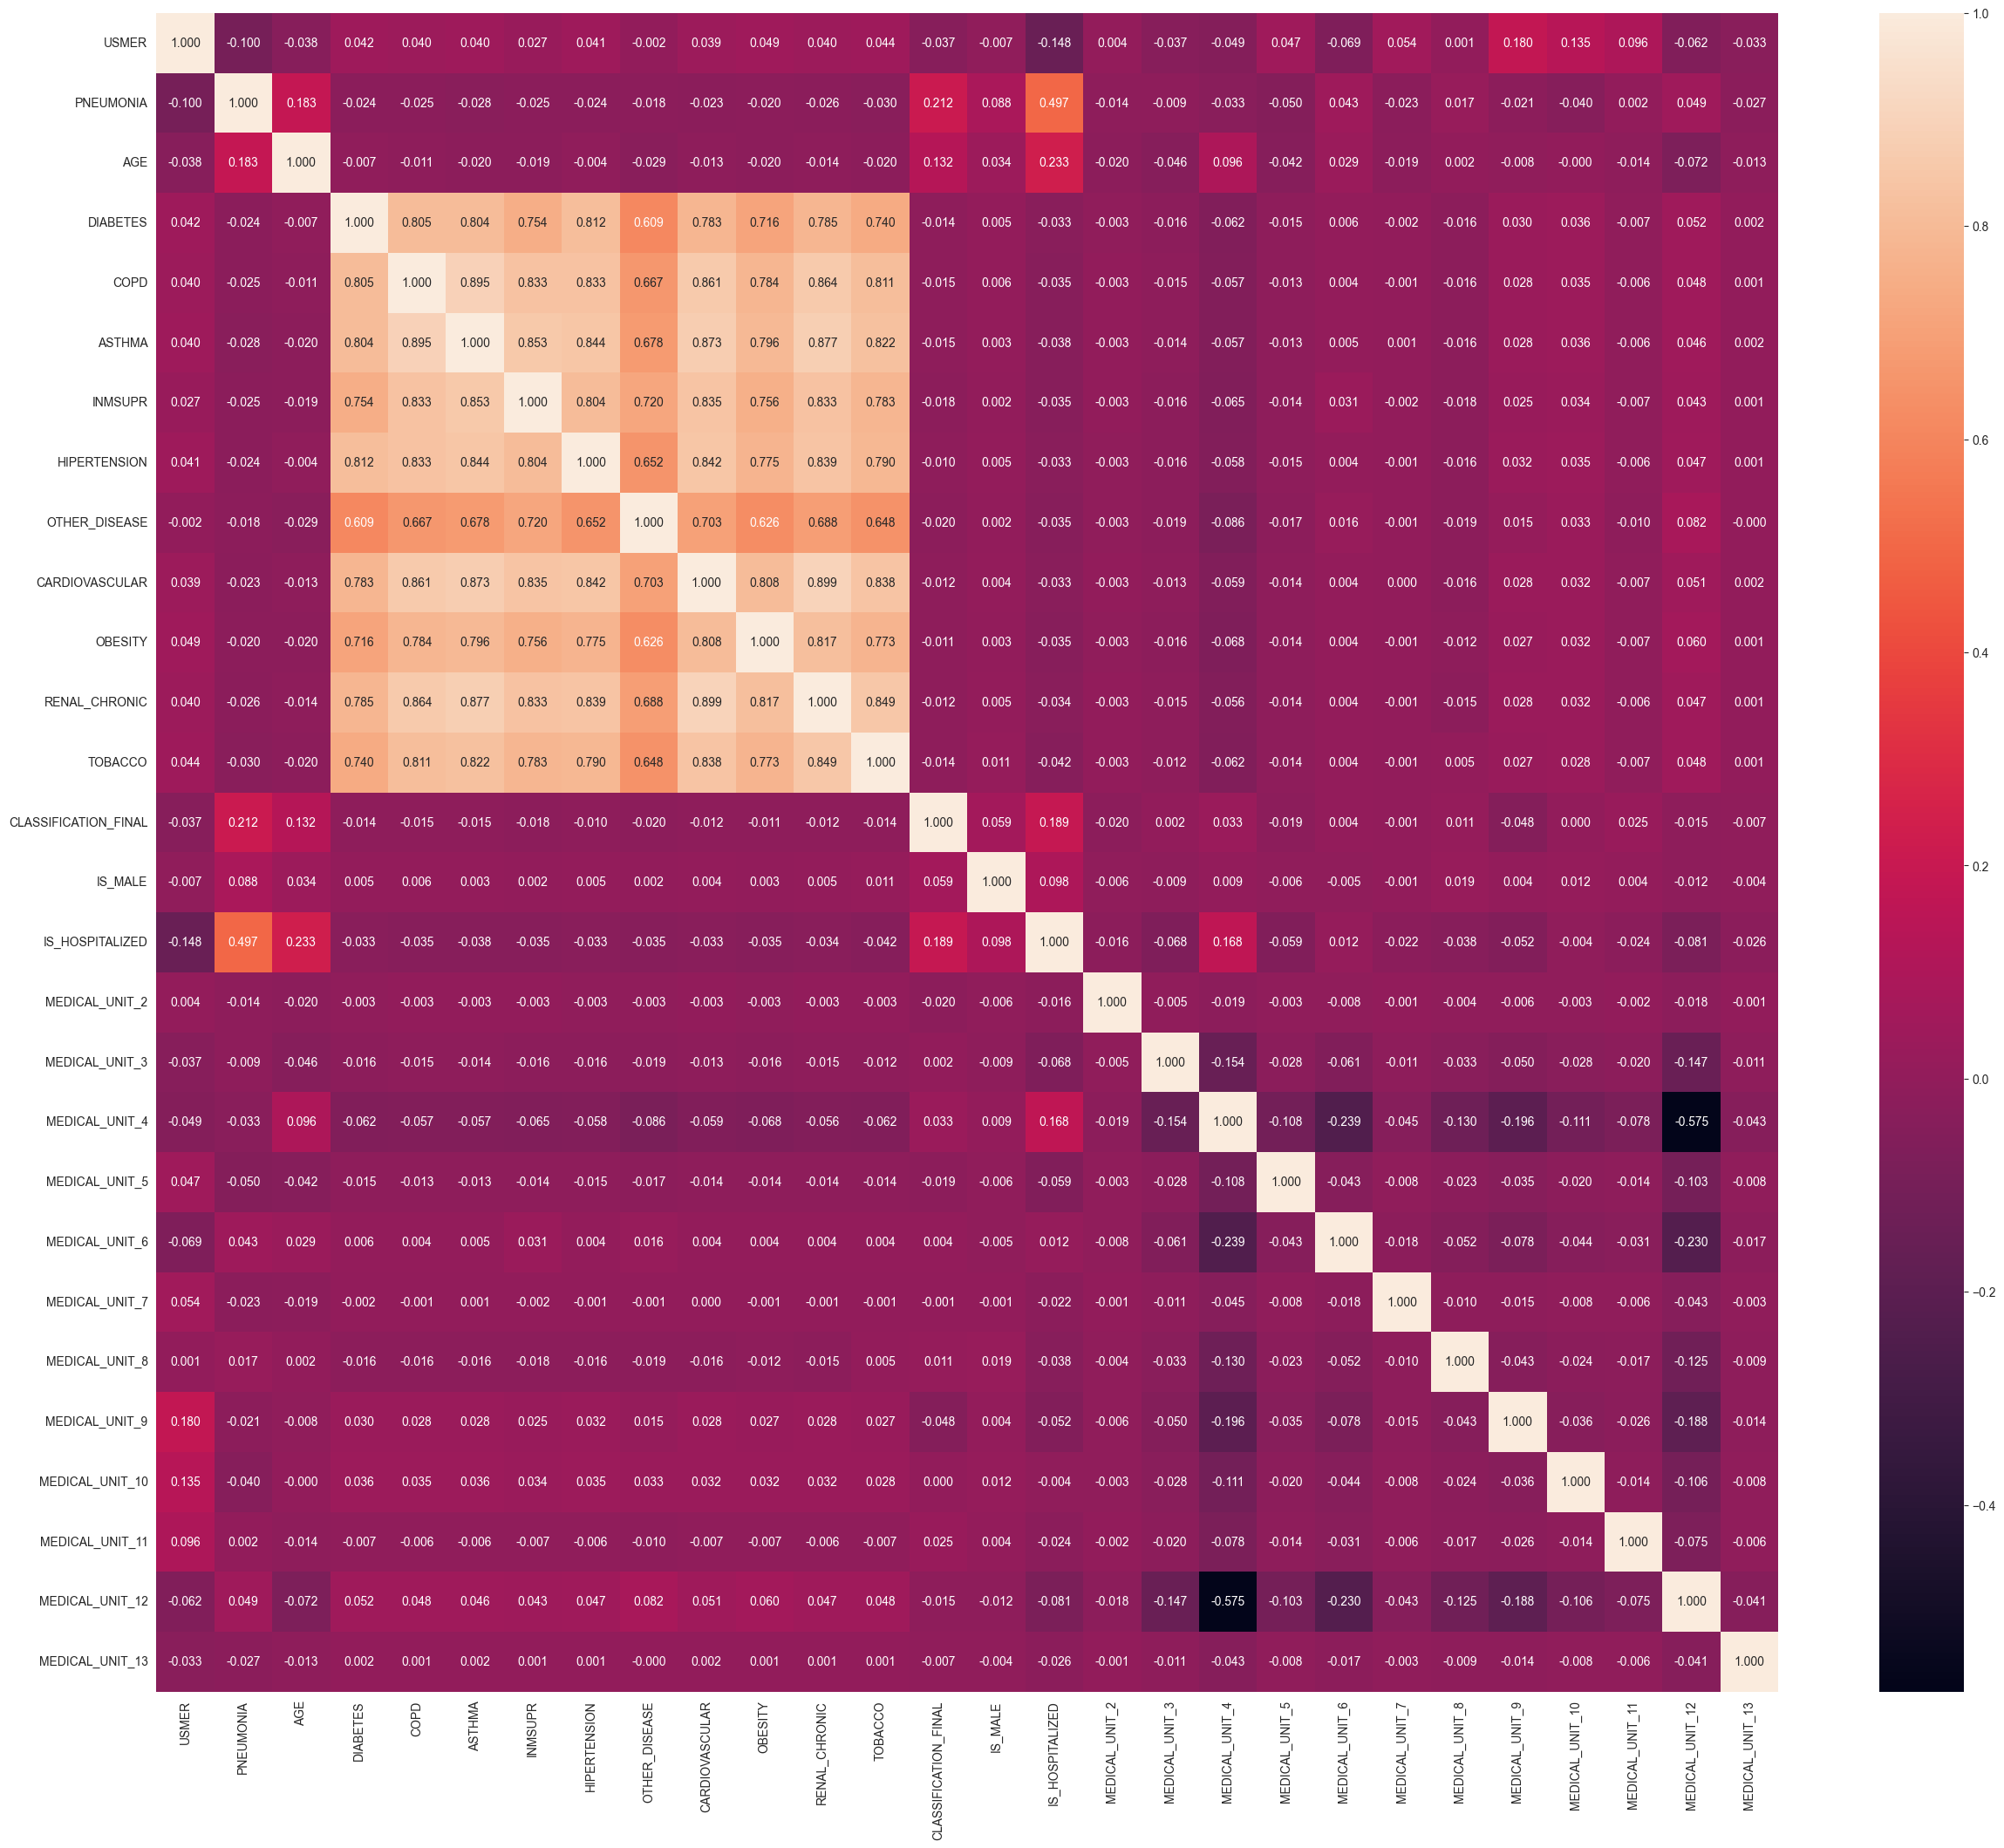

In [36]:
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")

Main attributes (have the biggest dependencies with our target value CLASSIFICATION_FINAL) are: **PNEUMONIA, AGE, IS_HOSPITALIZED**

**Hypothesis**

Null Hypothesis (**H0**):

The attributes: PNEUMONIA, AGE, IS_HOSPITALIZED and classification_final are independent.
The presence of attributes is not associated with the level of patient classification.

Alternative Hypothesis (**H1**):

The attributes: PNEUMONIA, AGE, IS_HOSPITALIZED are dependent.
The presence of attributes is associated with the level of patient classification.

In [37]:
cols = ['AGE', 'IS_HOSPITALIZED', 'PNEUMONIA'] 
target = 'CLASSIFICATION_FINAL'

for col in cols:
    table = pd.crosstab(data[col], data[target])
    chi2, p, dof, expected = chi2_contingency(table)
    
    print(f"Chi-Square test for {col}")
    print(f"Test result {chi2:.3f}, p-value = {p:.5f}, dof = {dof}")
    
    if p < 0.05:
        print(f"There IS a significant relationship between {col} and {target}.\n")
    else:
        print(f"There is NO significant relationship between {col} and {target}.\n")

Chi-Square test for AGE
Test result 6235.315, p-value = 0.00000, dof = 120
There IS a significant relationship between AGE and CLASSIFICATION_FINAL.

Chi-Square test for IS_HOSPITALIZED
Test result 8195.963, p-value = 0.00000, dof = 1
There IS a significant relationship between IS_HOSPITALIZED and CLASSIFICATION_FINAL.

Chi-Square test for PNEUMONIA
Test result 10298.019, p-value = 0.00000, dof = 1
There IS a significant relationship between PNEUMONIA and CLASSIFICATION_FINAL.



In [38]:
X_train.to_csv("X_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)

y_train.to_csv("y_train.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

The data normalization process has been completed.
As a result, all features are now numerical and scaled.

Our dataset is fully ready to be fed into the model.

## Configuration

This cell creates a configuration for training a baseline MLP model.
It defines model structure (layers, activation, dropout, BN),
training parameters (batch size, epochs, learning rate, early stopping),
and experiment metadata. The config is saved to and loaded from a JSON file.

In [39]:
import json

config_data = {
    "model": {
        "input_dim": 27,
        "hidden_layers": [128, 64, 32],
        "activation": "relu",
        "output_activation": "sigmoid",
        "dropout_rate": 0.3,
        "batch_norm": True,
        "skip_connection": False,
        "bottleneck": False
    },
    "training": {
        "batch_size": 64,
        "epochs": 30,
        "learning_rate": 0.001,
        "optimizer": "adam",
        "early_stopping": True,
        "patience": 5
    },
    "experiment": {
        "name": "baseline_mlp_dropout_bn",
        "description": "Baseline model with dropout and BN"
    }
}

with open("config.json", "w") as f:
    json.dump(config_data, f, indent=4)

with open("config.json", "r") as f:
    config = json.load(f)

## Experiment tracking

This cell defines a helper function for saving experiment results.
It stores the model’s metrics, configuration, experiment name, and timestamp
in a JSON file called "experiments_log.json".

If the file already exists, the new result is added to it. This helps compare
different experiments later.


In [40]:
from datetime import datetime


def log_experiment(metrics, config, filename="experiments_log.json"):
    entry = {
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "experiment_name": config["experiment"]["name"],
        "description": config["experiment"]["description"],
        "config": config,
        "metrics": metrics
    }

    try:
        with open(filename, "r") as f:
            logs = json.load(f)
    except FileNotFoundError:
        logs = []

    logs.append(entry)
    with open(filename, "w") as f:
        json.dump(logs, f, indent=4)

In [41]:
import pandas as pd
X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
X_test = pd.read_csv("X_test.csv")

y_train = pd.read_csv("y_train.csv").squeeze() 
y_val = pd.read_csv("y_val.csv").squeeze()
y_test = pd.read_csv("y_test.csv").squeeze()

## Experiments - meaningful based on the results of previous experiments
## Including improvement techniques (e.g. Dropout, Normalization layers, Skip Connections, Bottleneck Layers, …)

 This cell checks class distribution in the training set
 and creates class weights if the dataset is imbalanced.
 Class weights help the model pay more attention to the minority class.


In [42]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks, optimizers
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score
import wandb
import os

### Custom MLP Builder — Static vs Configurable Model

In our project we use **two versions of the MLP model**:

- **1) Static model (`build_mlp_a`)**  
  This one has a fixed architecture (512 → 256 → 128 → 64 → output).  
  We mainly keep it as a baseline to compare with the configurable model.

- **2) Configurable model (`build_mlp`)**  
  This model is built dynamically from a config dictionary or JSON file.  
  Here we can easily change number of layers, activation functions, dropout, batch norm, etc.  
  This is super useful when we run experiments (e.g. with W&B or saved `.json` configs) and want to reproduce them without rewriting code.

---

### Why we need `normalize_model_cfg()`

The function `normalize_model_cfg()` basically makes sure the configuration is always a **standard Python dict**, no matter where it comes from:

✔ `.json` file  
✔ W&B `config` object  
✔ Custom Python class with `.to_dict()`  
✔ Even TensorFlow/Keras `.to_json()` format

This allows us to load the model settings from **JSON / wandb / other sources** and build the network automatically without errors.

---

### ⚙ What `build_mlp()` actually does

- Takes the config from `normalize_model_cfg()`  
- Builds the network layer by layer (Dense → Activation → BatchNorm → Dropout)  
- Supports:
  - variable number of hidden layers (`hidden_layers=[256,128,64,...]`)
  - optional skip-connections every 2 layers
  - optional bottleneck layer
  - binary output (`sigmoid`) or multi-class (`softmax`)

---

In short:  
**`build_mlp_a` = fixed model**  
**`build_mlp`  = flexible model from config**  
**`normalize_model_cfg` = makes sure configs from JSON or W&B work the same way**



In [ ]:
from collections.abc import Mapping
import json

def build_mlp_a(input_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(512, kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(1e-5))(inputs)
    x = layers.LeakyReLU(0.1)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(256, kernel_initializer="he_normal")(x)
    x = layers.LeakyReLU(0.1)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, kernel_initializer="he_normal")(x)
    x = layers.LeakyReLU(0.1)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(64, kernel_initializer="he_normal")(x)
    x = layers.LeakyReLU(0.1)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    return tf.keras.Model(inputs, outputs)


def normalize_model_cfg(raw_cfg):
    if raw_cfg is None:
        raise ValueError("Model configuration is required.")

    if isinstance(raw_cfg, Mapping):
        return dict(raw_cfg)

    for attr_name in ("as_dict", "to_dict"):
        getter = getattr(raw_cfg, attr_name, None)
        if callable(getter):
            cfg = getter()
            if isinstance(cfg, Mapping):
                return dict(cfg)
            return cfg

    to_json = getattr(raw_cfg, "to_json", None)
    if callable(to_json):
        return json.loads(to_json())

    if hasattr(raw_cfg, "__dict__"):
        return {k: v for k, v in vars(raw_cfg).items() if not k.startswith("_")}

    raise TypeError(f"Unsupported model config type: {type(raw_cfg)}")


def build_mlp(raw_cfg, num_classes=1, show_summary=True):
    cfg = normalize_model_cfg(raw_cfg)

    input_dim = cfg["input_dim"]
    hidden_layers = cfg.get("hidden_layers", [])
    activation = cfg.get("activation", "relu")
    output_activation = cfg.get("output_activation", "sigmoid")
    dropout_rate = cfg.get("dropout_rate", 0.0)
    batch_norm = cfg.get("batch_norm", False)
    skip_connection = cfg.get("skip_connection", False)
    bottleneck = cfg.get("bottleneck", False)

    if num_classes > 1:
        output_activation = "softmax"
        
    inputs = layers.Input(shape=(input_dim,))
    x = inputs
    skips = []

    for i, units in enumerate(hidden_layers):
        x = layers.Dense(units, activation=activation)(x)
        if batch_norm:
            x = layers.BatchNormalization()(x)
        if dropout_rate and dropout_rate > 0:
            x = layers.Dropout(dropout_rate)(x)
        if skip_connection and i % 2 == 0:
            if skips and x.shape[-1] == skips[-1].shape[-1]:
                x = layers.Add()([x, skips[-1]])
            skips.append(x)

    if bottleneck:
        x = layers.Dense(16, activation=activation)(x)

    outputs = layers.Dense(num_classes, activation=output_activation)(x)
    model = tf.keras.Model(inputs, outputs)
    if show_summary:
        model.summary()
    return model

## **Experiments with wandb**

### `train_experiment()` – Training Function with Weights & Biases (W&B)

This function is responsible for training the neural network, logging results to Weights & Biases (W&B), and managing the whole experiment process. It includes model creation, optimizer selection, training loop, metric calculation, and logging.

---

#### 1. Initializing the W&B experiment

At the beginning of the function, a new W&B run is started.  
All parameters passed into the function (learning rate, batch size, dropout, hidden layers, etc.) are automatically stored in `wandb.config`.  
This makes it easy to reproduce or compare experiments later.

---

#### 2. Choosing the model type

There are two types of models in our project:

- **Static model (`build_mlp_a`)** – fixed architecture, always the same structure.
- **Configurable model (`build_mlp`)** – the architecture is built from a configuration (JSON or W&B config), where we can change the number of layers, activation functions, dropout, etc.

Based on the `model_type` argument, the function selects which model to build.  
The optimizer is also selected here (Adam, AdamW, or SGD).

---

#### 3. Compiling the model

```python
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


In [44]:

def train_experiment(
    project_name="covid_classification",
    experiment_name="default_run",
    model_type="a",
    input_dim=27,
    hidden_layers=[128, 64, 32],
    activation="relu",
    output_activation="sigmoid",
    dropout_rate=0.3,
    batch_norm=True,
    bottleneck=False,
    batch_size=64,
    epochs=30,
    learning_rate=1e-3,
    optimizer_type="adam",
    patience=5,
    weight_decay=1e-5,
    smooth_weight=0.8
):

    os.environ["WANDB_START_METHOD"] = "thread"
    wandb.init(
        project=project_name,
        name=experiment_name,
        config=locals(),
        settings=wandb.Settings(start_method="thread", init_timeout=300)
    )

    cfg = wandb.config
    model_cfg = normalize_model_cfg(cfg)

    def smooth(new, last, weight=smooth_weight):
        return last * weight + (1 - weight) * new

    if model_type == "a":
        model = build_mlp_a(input_dim)
        opt = AdamW(learning_rate=learning_rate, weight_decay=weight_decay)
    else:
        model = build_mlp(model_cfg, show_summary=False)
        if optimizer_type.lower() == "adamw":
            opt = AdamW(learning_rate=learning_rate, weight_decay=weight_decay)
        elif optimizer_type.lower() == "adam":
            opt = optimizers.Adam(learning_rate=learning_rate)
        elif optimizer_type.lower() == "sgd":
            opt = optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
        else:
            raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    cb = [
        callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6),
        callbacks.EarlyStopping(monitor="val_loss", patience=patience, restore_best_weights=True)
    ]

    last_acc, last_prec, last_rec, last_f1 = 0, 0, 0, 0

    for epoch in range(cfg.epochs):
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=1,
            batch_size=cfg.batch_size,
            verbose=0,
            callbacks=cb
        )

        y_pred = (model.predict(X_val, verbose=0) > 0.5).astype(int).ravel()
        y_true = np.array(y_val).astype(int).ravel()

        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        last_acc = smooth(acc, last_acc)
        last_prec = smooth(prec, last_prec)
        last_rec = smooth(rec, last_rec)
        last_f1 = smooth(f1, last_f1)

        wandb.log({
            "epoch": epoch + 1,
            "loss": history.history["loss"][0],
            "val_loss": history.history["val_loss"][0],
            "accuracy": last_acc,
            "precision": last_prec,
            "recall": last_rec,
            "f1": last_f1,
            "learning_rate": model.optimizer.learning_rate.numpy()
        })

    wandb.finish()
    return model


### Experiment Overview

Below are the experiments we ran using the `train_experiment()` function.  
Each experiment tests a different model configuration or optimizer setup to compare performance.


###  Overview of All Training Experiments

| Experiment Name        | Model Type | Optimizer | LR      | BatchNorm | Dropout | Bottleneck | Notes |
|------------------------|------------|-----------|---------|-----------|---------|------------|-------|
| `test`                 | Config (`b`) | AdamW     | 1e-4    | Yes       | Default | No         | Baseline configurable model. Used as the main reference. |
| `test_a_model`         | Static (`a`) | AdamW     | 1e-4    | Yes       | Yes     | No         | Fixed architecture MLP (build_mlp_a). Used to compare static vs configurable models. |
| `test_no_bn_dropout`   | Config (`b`) | Adam      | 1e-3    | No        | 0.0     | No         | No batch normalization and no dropout. Tests model without regularization. |
| `test_bottleneck`      | Config (`b`) | AdamW     | 1e-4    | Yes       | 0.2     | Yes        | Adds bottleneck layer to compress features before output. |
| `test_sgd_momentum`    | Config (`b`) | SGD       | 5e-3    | Yes       | 0.3     | No         | Uses SGD with momentum instead of Adam-based optimizers. |


In [45]:
model = train_experiment(
    experiment_name="test",
    model_type="b",
    optimizer_type="adamw",
    learning_rate=1e-4,
    epochs=40
)

wandb: WARNING `start_method` is deprecated and will be removed in a future version of wandb. This setting is currently non-functional and safely ignored.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.


ValueError: API key must be 40 characters long, yours was 2

In [8]:
model_a = train_experiment(
    experiment_name="test_a_model",
    model_type="a",
    optimizer_type="adamw",
    learning_rate=1e-4,
    epochs=40
)

In [72]:
model2 = train_experiment(
    experiment_name="test_no_bn_dropout",
    model_type="b",
    optimizer_type="adam",        
    learning_rate=1e-3,
    batch_norm=False, 
    dropout_rate=0.0,
    epochs=40
)

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.


ValueError: API key must be 40 characters long, yours was 2

In [10]:
model3 = train_experiment(
    experiment_name="test_bottleneck",
    model_type="b",
    optimizer_type="adamw",
    learning_rate=1e-4,
    bottleneck=True,
    batch_norm=True,
    dropout_rate=0.2,
    epochs=40
)

In [11]:
model4 = train_experiment(
    experiment_name="test_sgd_momentum",
    model_type="b",
    optimizer_type="sgd",
    learning_rate=5e-3,
    batch_norm=True,
    dropout_rate=0.3,
    epochs=40
)

# **Experiments on Jupiter notebook**

This block calculates class weights for imbalanced data.
Class weights help the model pay more attention to the minority class during training.

In [46]:
print("Class balance in y_train:", y_train.value_counts(normalize=True))
if (y_train == 1).mean() < 0.4 or (y_train == 1).mean() > 0.6:
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(enumerate(class_weights))
else:
    class_weight_dict = None
    print("Classes are balanced, no class_weight needed.")

Class balance in y_train: CLASSIFICATION_FINAL
0    0.506039
1    0.493961
Name: proportion, dtype: float64
Classes are balanced, no class_weight needed.


 ### This block defines a reusable functions to run experiments


In [47]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc as sk_auc

#### Function: `build_and_compile_model(config)`
Creates an MLP model using parameters from `config["model"]`.  
Then compiles it with Adam optimizer, binary cross-entropy loss and metrics like accuracy, AUC, precision and recall.

In [48]:
def build_and_compile_model(config):
    model_cfg = config["model"]
    model = build_mlp(model_cfg)
    optimizer = optimizers.Adam(learning_rate=config["training"]["learning_rate"])
    model.compile(optimizer=optimizer, loss="binary_crossentropy",
                  metrics=["accuracy", tf.keras.metrics.AUC(name='auc'),
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall')])
    return model

#### Function: `train_model(model, train_cfg, X_train, y_train, X_val, y_val, class_weight=None)`
Trains the compiled model on the training set.  
Uses validation data and EarlyStopping if it's enabled in the config.  
Returns the `history` object from Keras.

In [49]:
def train_model(model, train_cfg, X_train, y_train, X_val, y_val, class_weight=None):
    callbacks = []
    if train_cfg["early_stopping"]:
        callbacks.append(EarlyStopping(monitor="val_loss", patience=train_cfg["patience"],
                                       restore_best_weights=True))
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=train_cfg["epochs"],
        batch_size=train_cfg["batch_size"],
        callbacks=callbacks,
        class_weight=class_weight,
        verbose=0
    )
    return history

#### Function: `analyze_history(history)`
Converts training history into a DataFrame and prints useful stats:  
- Min validation loss  
- Best validation accuracy, AUC, precision, recall  
Helps to understand at which epoch the model performed best.

In [50]:
def analyze_history(history):
    history_df = pd.DataFrame(history.history)
    print("Training History Summary:")
    print(history_df.describe())
    print("\nBest Validation Metrics:")
    print(f"Best Val Loss: {history_df['val_loss'].min():.4f} at epoch {history_df['val_loss'].idxmin() + 1}")
    print(f"Best Val Accuracy: {history_df['val_accuracy'].max():.4f} at epoch {history_df['val_accuracy'].idxmax() + 1}")
    print(f"Best Val AUC: {history_df['val_auc'].max():.4f} at epoch {history_df['val_auc'].idxmax() + 1}")
    if 'val_precision' in history_df:
        print(f"Best Val Precision: {history_df['val_precision'].max():.4f} at epoch {history_df['val_precision'].idxmax() + 1}")
    if 'val_recall' in history_df:
        print(f"Best Val Recall: {history_df['val_recall'].max():.4f} at epoch {history_df['val_recall'].idxmax() + 1}")
    return history_df

#### Function: `visualize_results(history_df, config, model, X_test, y_test)`
Creates training visualisations:
- Loss, Accuracy, AUC, Precision, Recall over epochs  
- ROC curve on the test set  
Returns predicted probabilities (`y_pred_prob`) for evaluation.

In [51]:
def visualize_results(history_df, config, model, X_test, y_test):
    sns.set(style="whitegrid")
    plt.figure(figsize=(18, 10))
    plt.suptitle(f"Training Results: {config['experiment']['name']}", fontsize=16)
    # Loss
    plt.subplot(2, 3, 1)
    sns.lineplot(data=history_df[['loss', 'val_loss']])
    plt.title("Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    # Accuracy
    plt.subplot(2, 3, 2)
    sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
    plt.title("Accuracy Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    # AUC
    if 'auc' in history_df:
        plt.subplot(2, 3, 3)
        sns.lineplot(data=history_df[['auc', 'val_auc']])
        plt.title("AUC Curves")
        plt.xlabel("Epochs")
        plt.ylabel("AUC")
    # Precision
    if 'precision' in history_df:
        plt.subplot(2, 3, 4)
        sns.lineplot(data=history_df[['precision', 'val_precision']])
        plt.title("Precision Curves")
        plt.xlabel("Epochs")
        plt.ylabel("Precision")
    # Recall
    if 'recall' in history_df:
        plt.subplot(2, 3, 5)
        sns.lineplot(data=history_df[['recall', 'val_recall']])
        plt.title("Recall Curves")
        plt.xlabel("Epochs")
        plt.ylabel("Recall")
    # ROC Curve
    plt.subplot(2, 3, 6)
    y_pred_prob = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = sk_auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve (Test Set)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    return y_pred_prob  # Return probabilities for evaluation

#### Function: `evaluate_model(model, X_test, y_test, history, y_pred_prob)`
Evaluates the model on the test data.  
Calculates:
- Loss, Accuracy, AUC, Precision, Recall, F1-score  
- Confusion Matrix  
Also checks if there is overfitting.  
Returns all metrics in a dictionary.

In [52]:
def evaluate_model(model, X_test, y_test, history, y_pred_prob):
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    if final_val_loss > final_train_loss * 1.2:
        print("⚠ Warning: Possible overfitting detected")
    y_pred = (y_pred_prob > 0.5).astype(int)
    loss, acc, auc, prec, rec = model.evaluate(X_test, y_test, verbose=0)
    f1 = f1_score(y_test, y_pred)
    print("\nTest Metrics:")
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    metrics = {
        "loss": loss, "accuracy": acc, "auc": auc,
        "precision": prec, "recall": rec, "f1": f1
    }
    return metrics

#### Function: `log_and_return(model, metrics, config)`
Prints the final experiment result in a short format.  
Logs metrics + config to `experiments_log.json`.  
Returns the model and metrics.

In [53]:
def log_and_return(model, metrics, config):
    print(f"✅ {config['experiment']['name']} -> acc={metrics['accuracy']:.3f}, auc={metrics['auc']:.3f}, f1={metrics['f1']:.3f}")
    log_experiment(metrics, config)
    return model, metrics

### Function: `run_experiment(config, class_weight=None)`
Main function that runs the full experiment pipeline:  
1. Builds and compiles the model  
2. Trains it  
3. Shows training stats and plots  
4. Evaluates on test data  
5. Logs everything  
Returns the trained model and evaluation metrics.

In [54]:
def run_experiment(config, class_weight=None):
    train_cfg = config["training"]
    model = build_and_compile_model(config)
    history = train_model(model, train_cfg, X_train, y_train, X_val, y_val, class_weight)
    history_df = analyze_history(history)
    y_pred_prob = visualize_results(history_df, config, model, X_test, y_test)
    metrics = evaluate_model(model, X_test, y_test, history, y_pred_prob)
    return log_and_return(model, metrics, config)

###  Experiment Pipeline – Step-by-step Model Improvements

This block performs a sequence of experiments to gradually improve the MLP model.  
Each experiment adds only ONE new enhancement, so we can clearly see its impact on performance.

The experiments are run in the following order:


1. **Baseline**   (no improvements)
2. **Dropout**
3. **Batch Normalization**
4. **Skip Connections**
5. **Full improvements with Bottleneck**

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 0 (0.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  15.000000  15.000000  15.000000  15.000000  15.000000     15.000000   
mean    0.631396   0.671631   0.647003   0.634646   0.598066      0.630290   
std     0.003780   0.006255   0.004555   0.003841   0.005026      0.002746   
min     0.620511   0.652705   0.643344   0.623769   0.583967      0.621871   
25%     0.630450   0.670268   0.644405   0.632793   0.597511      0.630461   
50%     0.632670   0.673342   0.645667   0.636500   0.598847      0.630941   
75%     0.633832   0.675608   0.647637   0.637064   0.601672      0.631348   
max     0.634938   0.677306   0.661661   0.638128   0.602769      0.633034   

         val_auc   val_loss  val_precision  val_recall  
count  15.000000  15.000000      15.000000   15.000000  
mean    0.669214   0.648827       0.634933    0.592761  
std     0.002486   0.001395       0.007177    0.023151  
min     0.662759   0.647733       0.626018 

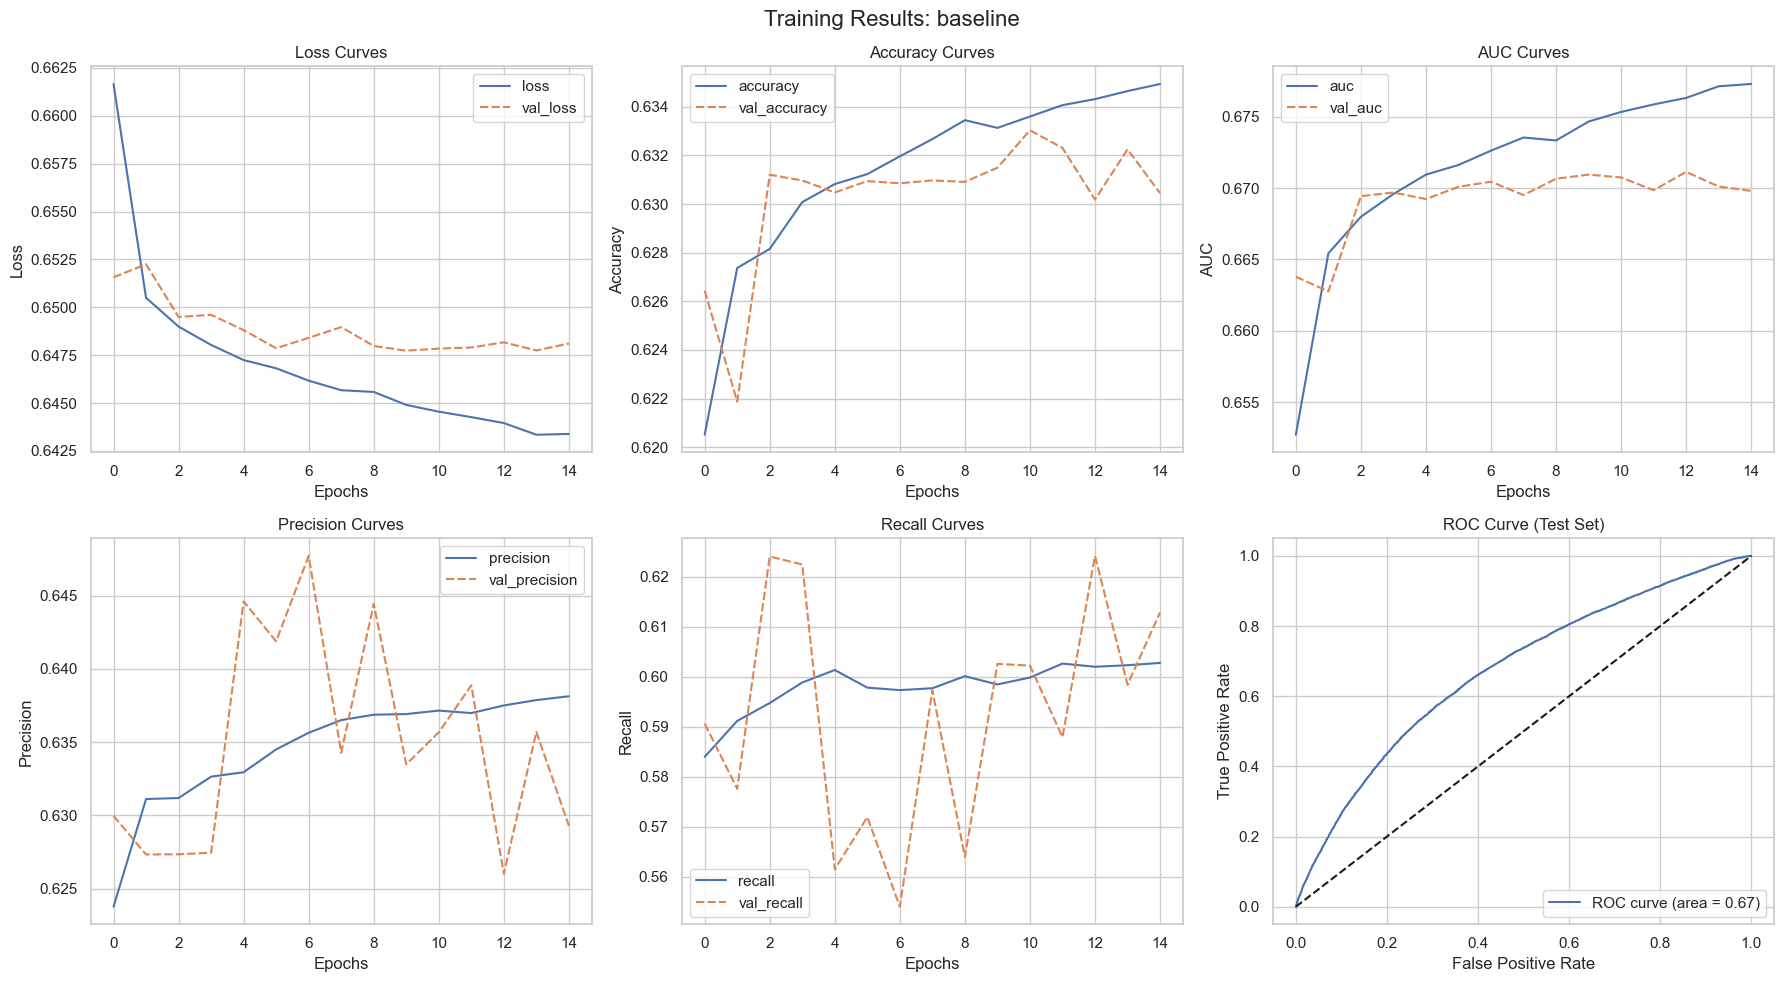


Test Metrics:
Loss: 0.6459
Accuracy: 0.6313
AUC: 0.6735
Precision: 0.6330
Recall: 0.6034
F1-Score: 0.6179

Confusion Matrix:
[[11463  5945]
 [ 6739 10254]]
✅ baseline -> acc=0.631, auc=0.674, f1=0.618


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 0 (0.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  19.000000  19.000000  19.000000  19.000000  19.000000     19.000000   
mean    0.627667   0.662999   0.652834   0.630623   0.594466      0.629754   
std     0.005997   0.008541   0.007187   0.006803   0.006405      0.002487   
min     0.604932   0.631955   0.648999   0.604764   0.577851      0.623935   
25%     0.628469   0.662989   0.649722   0.629780   0.592851      0.629081   
50%     0.629587   0.666174   0.650462   0.632523   0.595291      0.630767   
75%     0.630362   0.667396   0.652408   0.633870   0.597883      0.631188   
max     0.631175   0.668595   0.680942   0.635760   0.603614      0.632569   

         val_auc   val_loss  val_precision  val_recall  
count  19.000000  19.000000      19.000000   19.000000  
mean    0.667812   0.649538       0.629375    0.609596  
std     0.002864   0.001606       0.005035    0.014647  
min     0.658715   0.648259       0.615958 

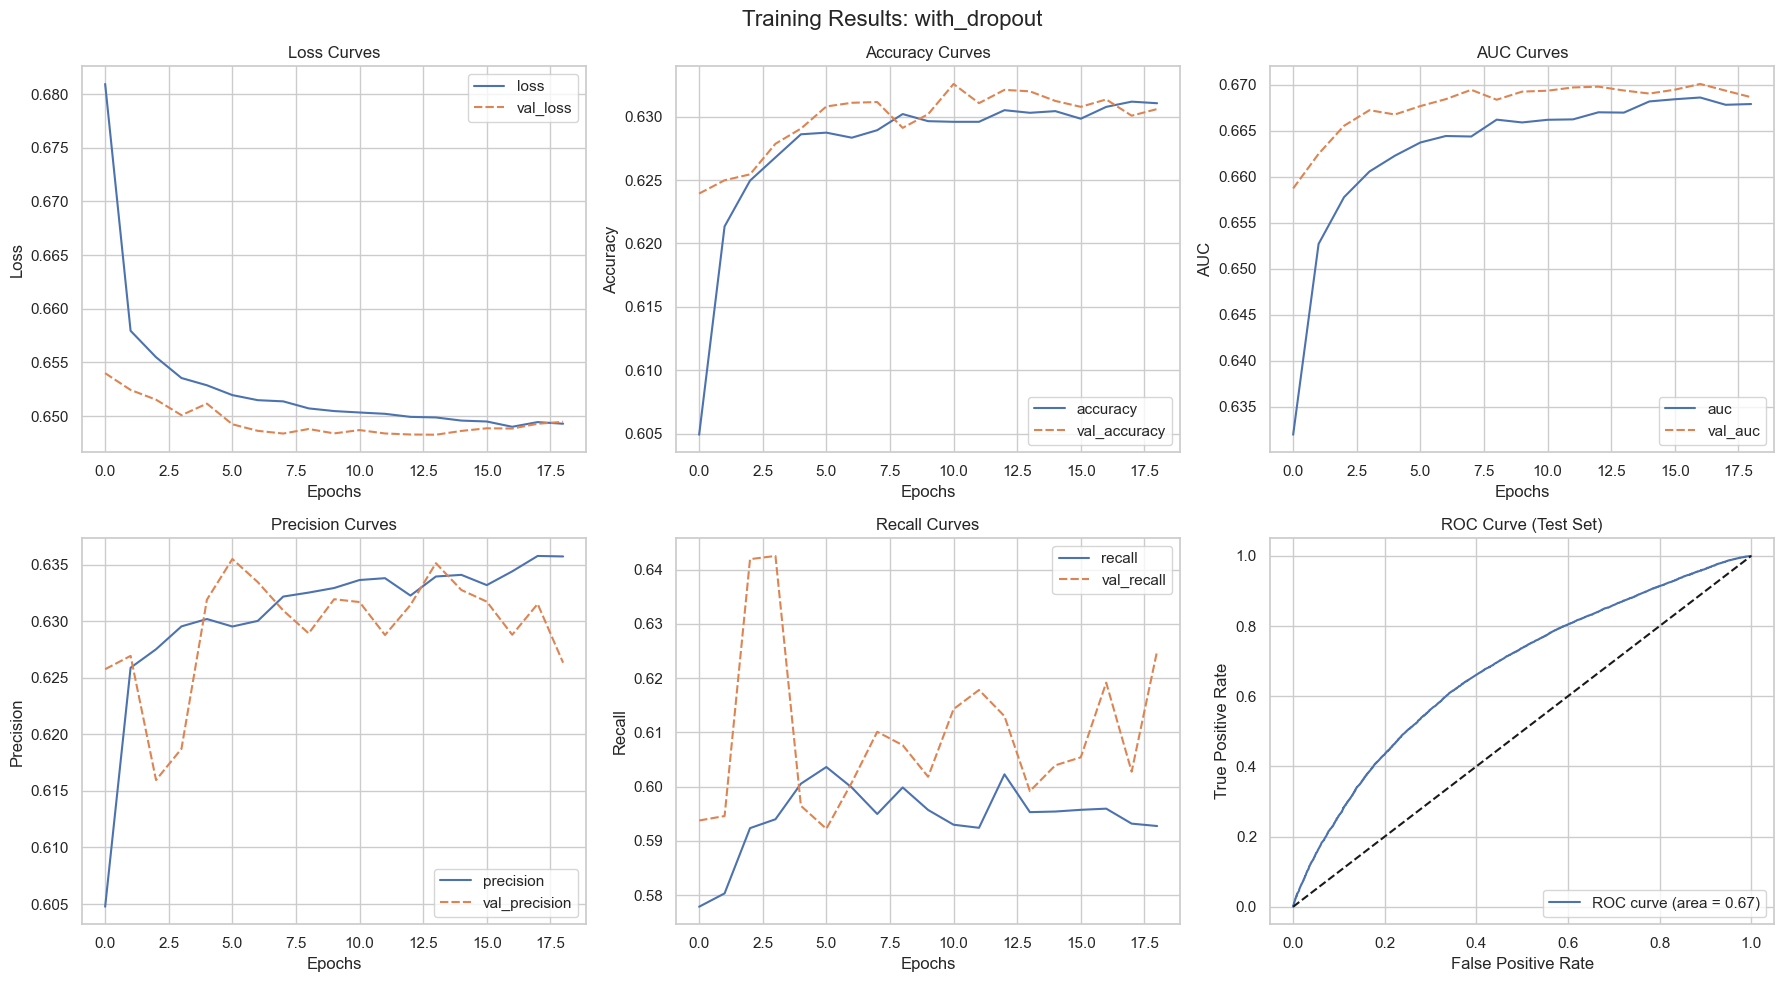


Test Metrics:
Loss: 0.6461
Accuracy: 0.6337
AUC: 0.6731
Precision: 0.6359
Recall: 0.6044
F1-Score: 0.6198

Confusion Matrix:
[[11528  5880]
 [ 6722 10271]]
✅ with_dropout -> acc=0.634, auc=0.673, f1=0.620


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,401 (56.25 KB)

 Non-trainable params: 448 (1.75 KB)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  19.000000  19.000000  19.000000  19.000000  19.000000     19.000000   
mean    0.626039   0.660810   0.653311   0.630958   0.585325      0.628395   
std     0.007233   0.010005   0.007044   0.008173   0.006679      0.002413   
min     0.597576   0.622089   0.649707   0.598143   0.564698      0.621087   
25%     0.626488   0.660576   0.650606   0.631881   0.583393      0.627758   
50%     0.627967   0.664200   0.651047   0.633246   0.586401      0.629081   
75%     0.629254   0.665112   0.653029   0.634139   0.590632      0.629924   
max     0.629861   0.666746   0.681397   0.635032   0.592025      0.630679   

         val_auc   val_loss  val_precision  val_recall  
count  19.000000  19.000000      19.000000   19.000000  
mean    0.666823   0.653873       0.625734    0.616996  
std     0.003438   0.002432       0.004894    0.023000  
min     0.656602   0.651122       0.617331 

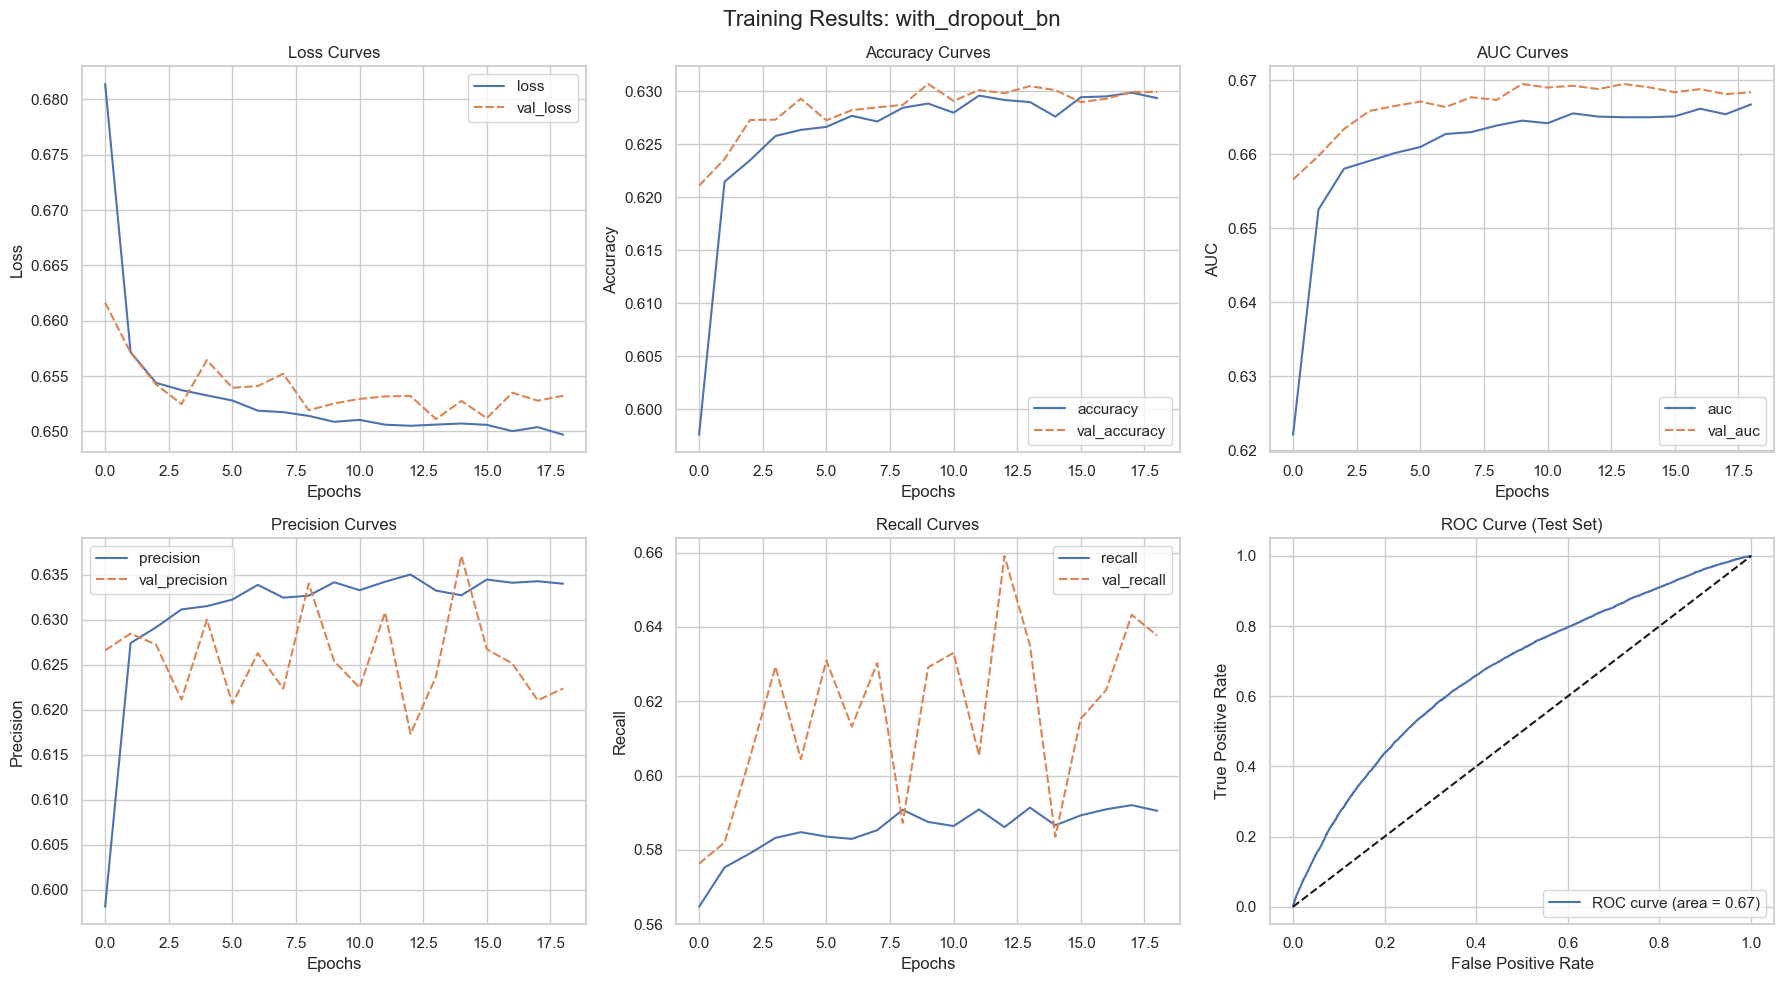


Test Metrics:
Loss: 0.6501
Accuracy: 0.6307
AUC: 0.6713
Precision: 0.6231
Recall: 0.6388
F1-Score: 0.6308

Confusion Matrix:
[[10842  6566]
 [ 6138 10855]]
✅ with_dropout_bn -> acc=0.631, auc=0.671, f1=0.631


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,401 (56.25 KB)

 Non-trainable params: 448 (1.75 KB)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  28.000000  28.000000  28.000000  28.000000  28.000000     28.000000   
mean    0.627030   0.662781   0.652096   0.631856   0.587118      0.629362   
std     0.006050   0.008796   0.006015   0.007461   0.003625      0.002901   
min     0.598024   0.621684   0.649275   0.595363   0.576552      0.618034   
25%     0.627823   0.663560   0.649826   0.632710   0.585512      0.629378   
50%     0.628621   0.665031   0.650650   0.633730   0.588160      0.630447   
75%     0.629282   0.666505   0.651372   0.634159   0.589588      0.631014   
max     0.629799   0.667560   0.681264   0.635577   0.592214      0.631551   

         val_auc   val_loss  val_precision  val_recall  
count  28.000000  28.000000      28.000000   28.000000  
mean    0.667839   0.653628       0.632120    0.598029  
std     0.003646   0.003764       0.005465    0.025603  
min     0.656704   0.650231       0.618183 

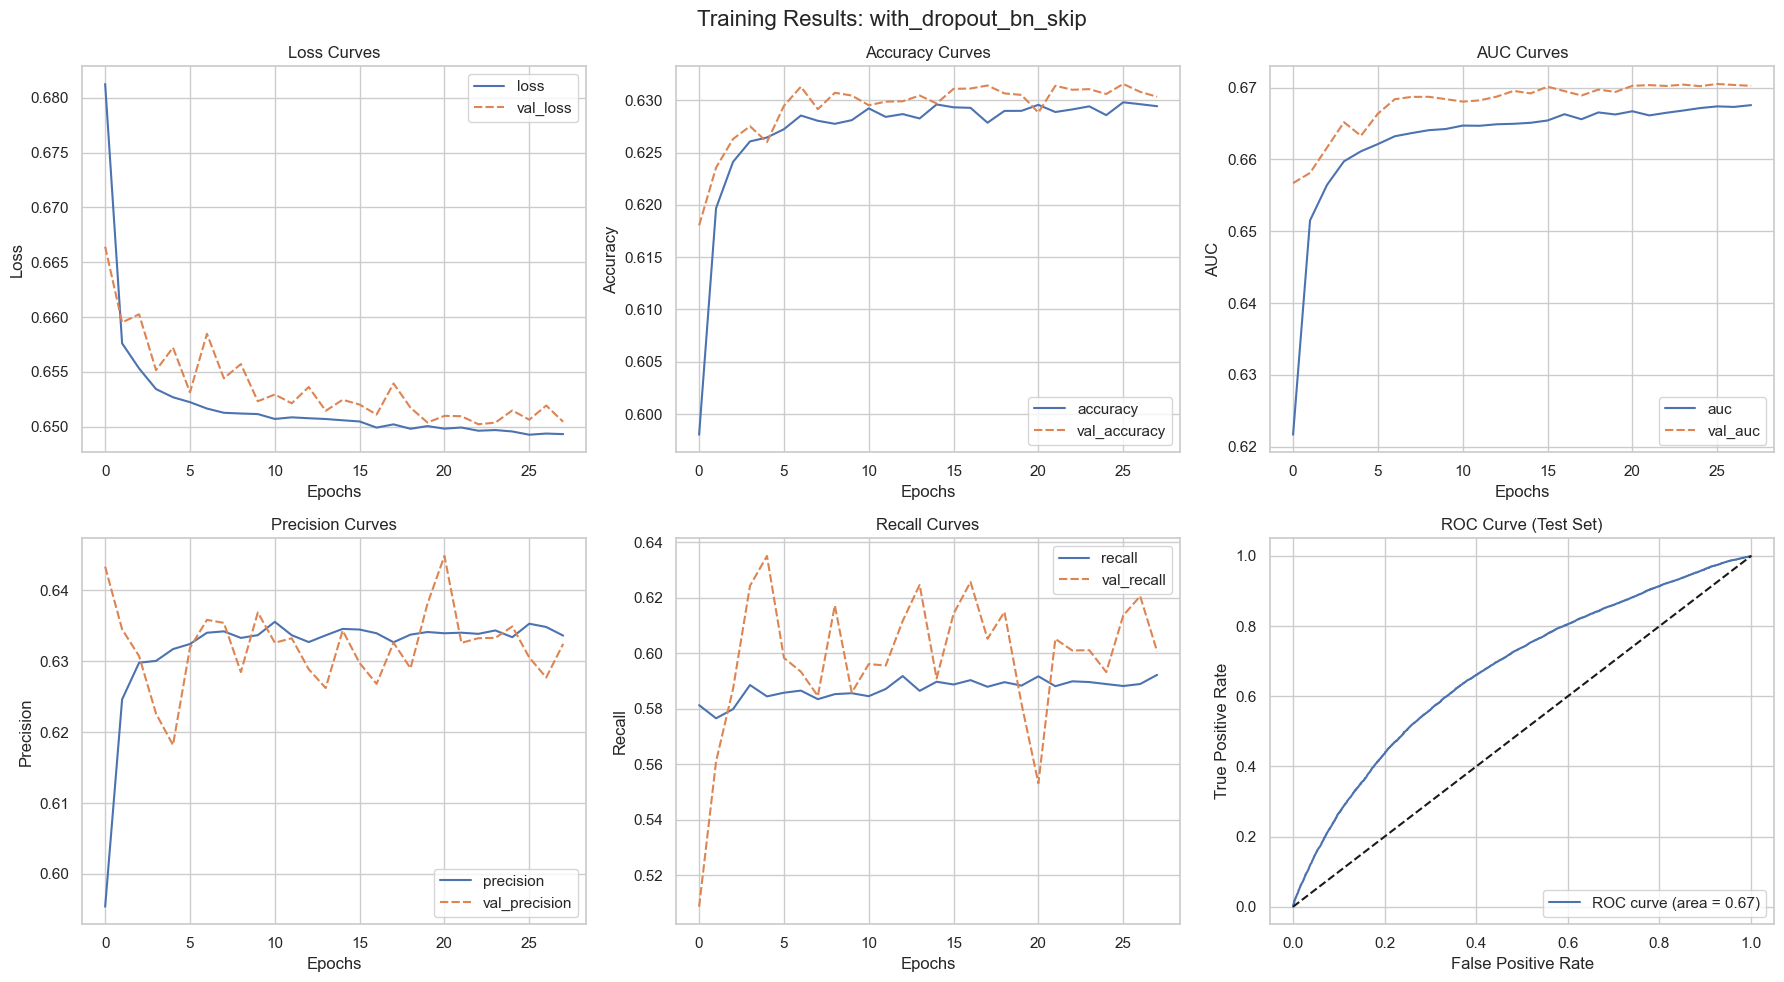


Test Metrics:
Loss: 0.6486
Accuracy: 0.6327
AUC: 0.6737
Precision: 0.6349
Recall: 0.6035
F1-Score: 0.6188

Confusion Matrix:
[[11511  5897]
 [ 6737 10256]]
✅ with_dropout_bn_skip -> acc=0.633, auc=0.674, f1=0.619


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 14,913 (58.25 KB)

 Non-trainable params: 448 (1.75 KB)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  22.000000  22.000000  22.000000  22.000000  22.000000     22.000000   
mean    0.625840   0.661399   0.652567   0.630299   0.586900      0.627319   
std     0.007094   0.009937   0.005884   0.008639   0.005246      0.002937   
min     0.596118   0.621237   0.649039   0.593738   0.577536      0.616784   
25%     0.626595   0.662009   0.649802   0.631949   0.582227      0.626377   
50%     0.627425   0.664500   0.650837   0.632483   0.586420      0.627990   
75%     0.629096   0.666259   0.652108   0.633394   0.590909      0.628913   
max     0.629649   0.667841   0.676907   0.635672   0.597057      0.630999   

         val_auc   val_loss  val_precision  val_recall  
count  22.000000  22.000000      22.000000   22.000000  
mean    0.664861   0.654256       0.622467    0.625968  
std     0.003024   0.003067       0.007867    0.036884  
min     0.657020   0.651403       0.611666 

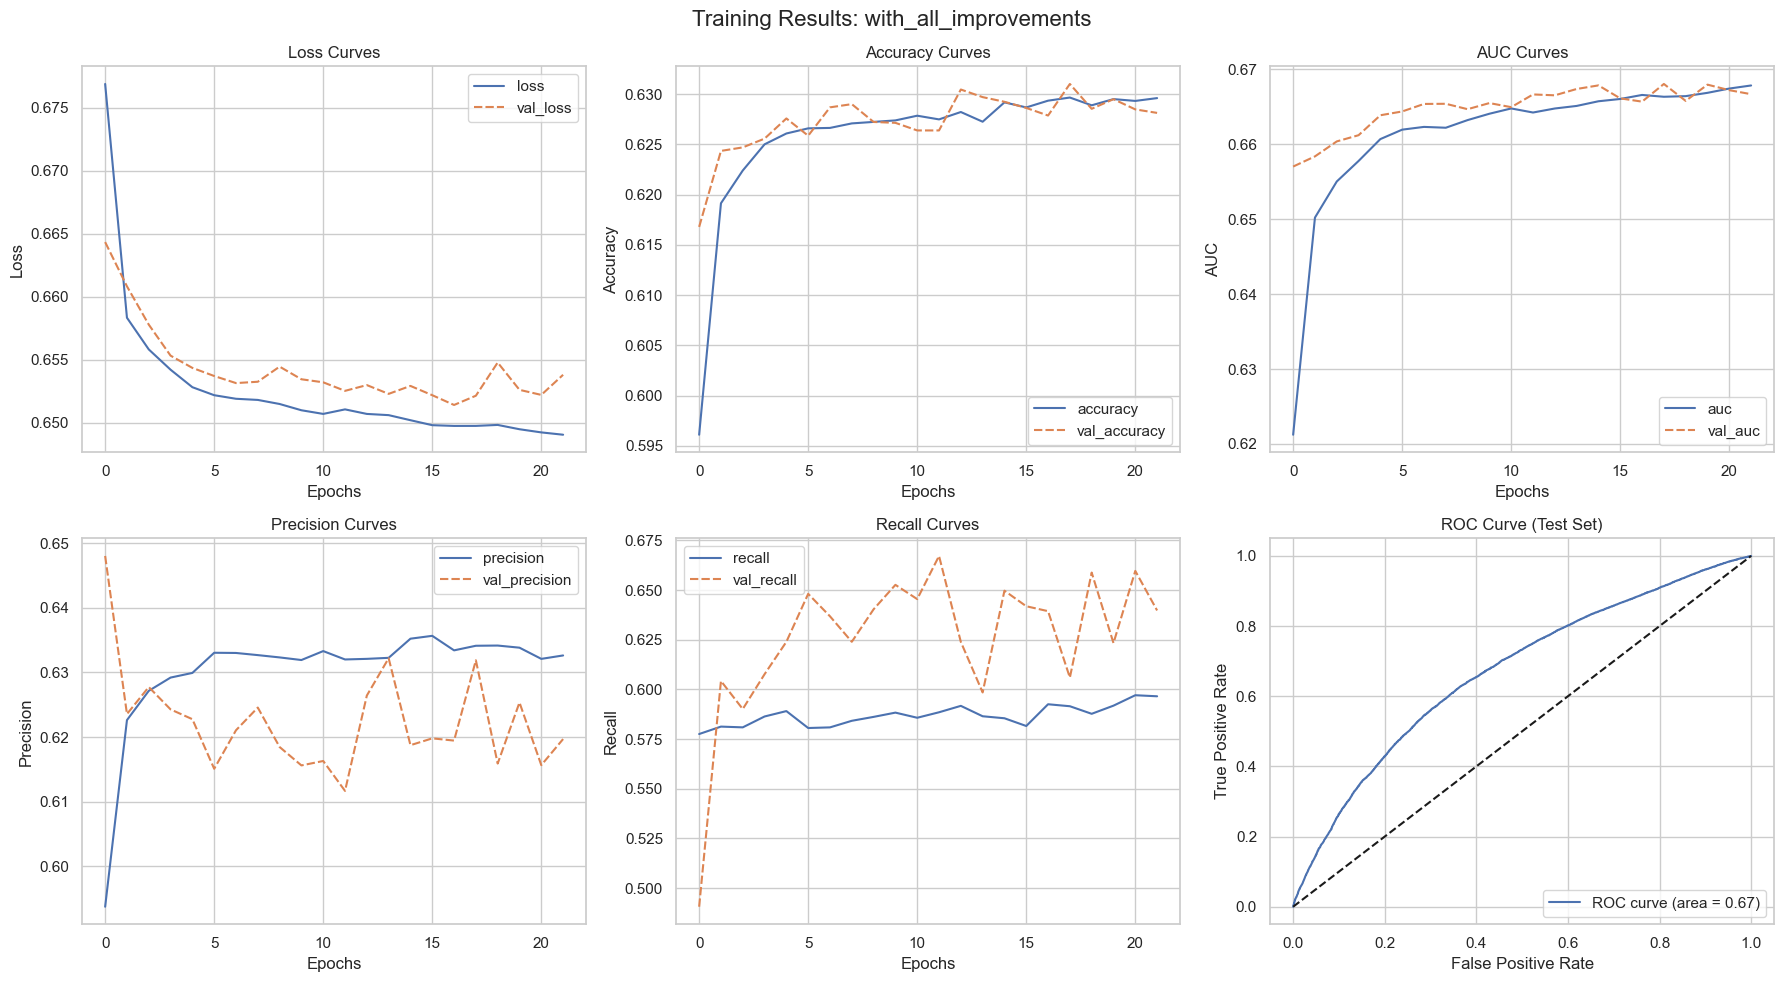


Test Metrics:
Loss: 0.6497
Accuracy: 0.6297
AUC: 0.6699
Precision: 0.6209
Recall: 0.6427
F1-Score: 0.6316

Confusion Matrix:
[[10739  6669]
 [ 6071 10922]]
✅ with_all_improvements -> acc=0.630, auc=0.670, f1=0.632


(<Functional name=functional_4, built=True>,
 {'loss': 0.6497263312339783,
  'accuracy': 0.6296619176864624,
  'auc': 0.669920027256012,
  'precision': 0.6208856701850891,
  'recall': 0.6427352428436279,
  'f1': 0.6316215591024751})

In [55]:
# Baseline
config["model"].update({
    "dropout_rate": 0,
    "batch_norm": False,
    "skip_connection": False,
    "bottleneck": False
})
config["experiment"]["name"] = "baseline"
config["experiment"]["description"] = "Baseline without improvements"
baseline_model, baseline_metrics = run_experiment(config, class_weight=class_weight_dict)

# Dropout
config["model"].update({
    "dropout_rate": 0.3
})
config["experiment"]["name"] = "with_dropout"
config["experiment"]["description"] = "Added dropout for regularization"
run_experiment(config, class_weight=class_weight_dict)

# BN
config["model"].update({
    "batch_norm": True
})
config["experiment"]["name"] = "with_dropout_bn"
config["experiment"]["description"] = "Added BN to stabilize training"
run_experiment(config, class_weight=class_weight_dict)

# Skip
config["model"].update({
    "skip_connection": True
})
config["experiment"]["name"] = "with_dropout_bn_skip"
config["experiment"]["description"] = "Added skip connections for gradient flow"
run_experiment(config, class_weight=class_weight_dict)

# Full improvements
config["model"].update({
    "bottleneck": True
})
config["experiment"]["name"] = "with_all_improvements"
config["experiment"]["description"] = "Full improvements including bottleneck"
run_experiment(config, class_weight=class_weight_dict)

###  Experiment Results Summary

After running multiple experiments, we noticed that the best-performing model was the one named **`with_all_improvements`**.  
This model included batch normalization, dropout, and the bottleneck layer, and it achieved the highest performance on the validation set.

We also observed that the models that used **batch normalization and dropout** consistently performed better than those without them.  
This means that these two techniques have the **strongest positive impact on the final results**, as they help the network generalize better and avoid overfitting.



## Hyperparameter search (grid/random) / sweep

### Hyperparameter Search with `ParameterSampler`

This block is used to test different MLP configurations and find a more effective model architecture.  
Instead of manually changing parameters every time, we generate multiple random combinations using `ParameterSampler`.

This method is more efficient than a full grid search because it allows us to explore many different setups without testing every possible combination.

---

**Parameters that are being randomly tested:**
- `dropout_rate` – amount of dropout for regularization  
- `batch_norm` – whether Batch Normalization is used  
- `bottleneck` – adds a dense bottleneck layer before the output  
- `skip_connection` – enables residual connections between layers  
- `hidden_layers` – different network depths and layer sizes  
- `learning_rate`, `batch_size`, `epochs` – training hyperparameters

---

**For each randomly generated configuration:**
1. The model and training parameters are updated inside `config`  
2. A unique experiment name is assigned (`random_i`)  
3. `run_experiment()` trains the model, evaluates it and logs results to W&B

---

This approach helps us understand which components (dropout, batch norm, bottleneck, etc.) actually improve performance and which ones do not have a significant effect.


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,385 (189.00 KB)

 Trainable params: 48,385 (189.00 KB)

 Non-trainable params: 0 (0.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  17.000000  17.000000  17.000000  17.000000  17.000000     17.000000   
mean    0.627049   0.662023   0.654106   0.630457   0.591971      0.630009   
std     0.006503   0.009402   0.010574   0.006980   0.008860      0.002827   
min     0.603730   0.630106   0.648990   0.605273   0.568544      0.620447   
25%     0.626553   0.661732   0.649924   0.629673   0.591369      0.629982   
50%     0.628734   0.665555   0.650937   0.631123   0.593690      0.630854   
75%     0.630334   0.667083   0.652752   0.634719   0.597700      0.631580   
max     0.630783   0.668835   0.693866   0.635721   0.600537      0.632249   

         val_auc   val_loss  val_precision  val_recall  
count  17.000000  17.000000      17.000000   17.000000  
mean    0.667628   0.649787       0.633302    0.596762  
std     0.003424   0.002215       0.004607    0.024744  
min     0.656284   0.648029       0.626686 

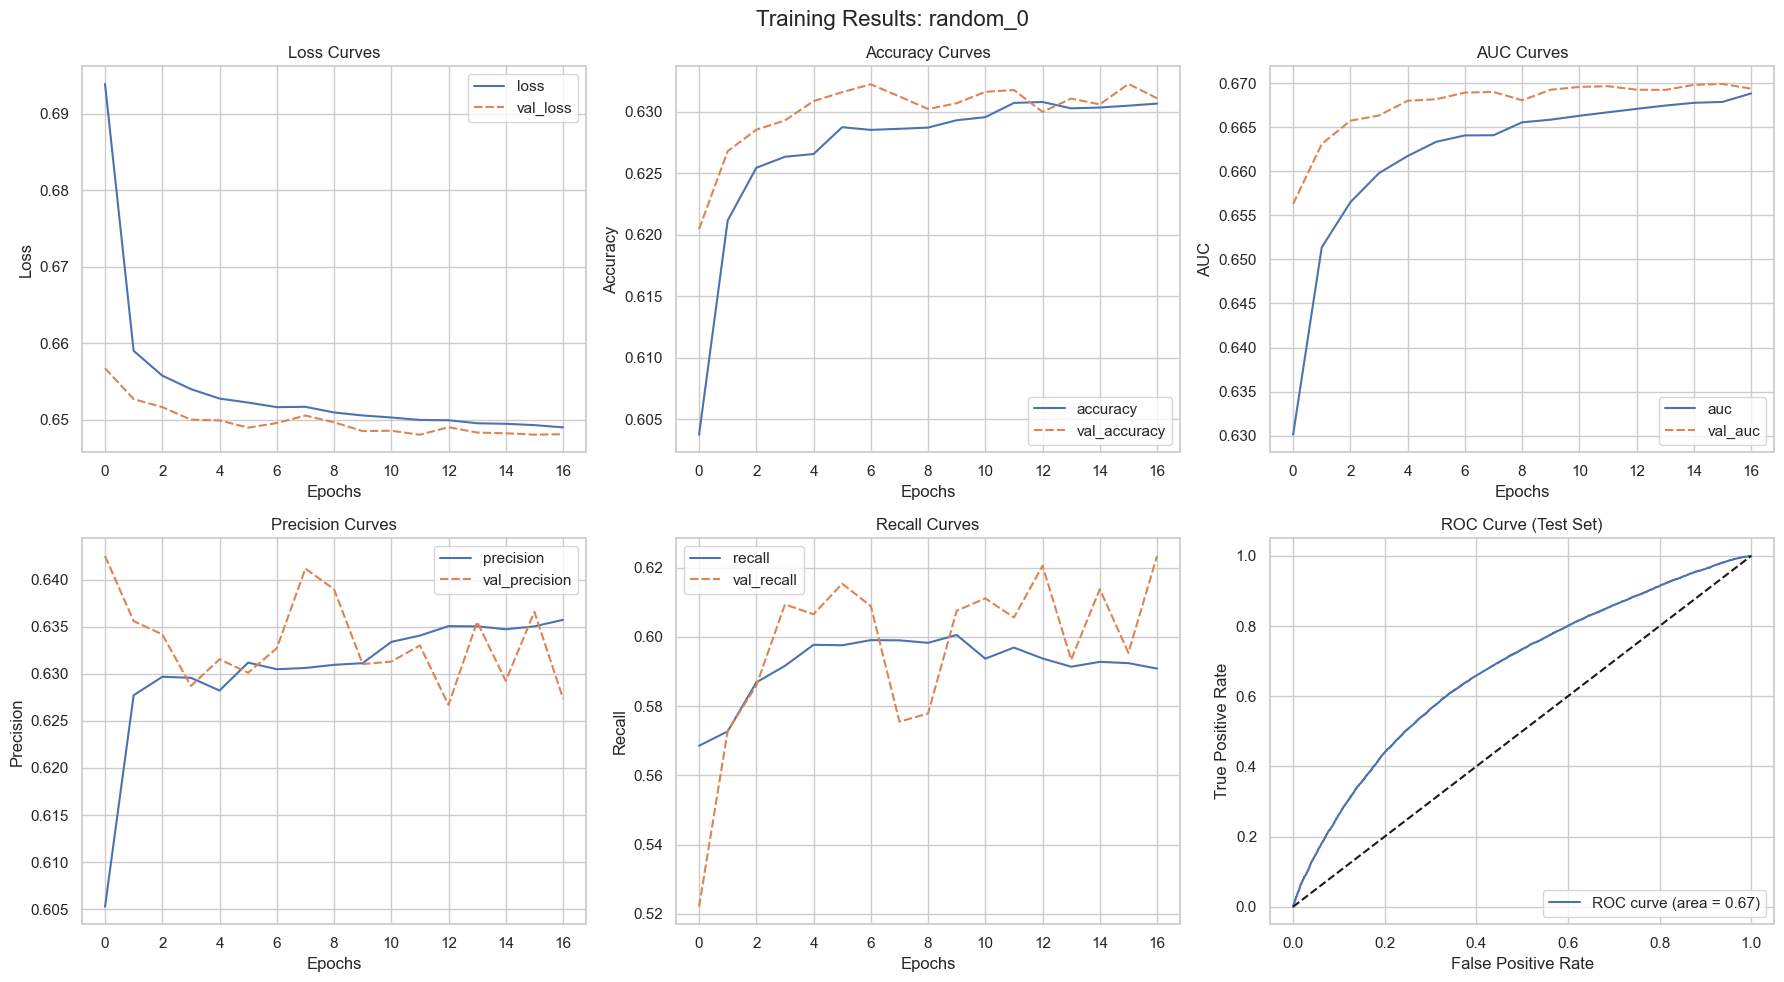


Test Metrics:
Loss: 0.6463
Accuracy: 0.6333
AUC: 0.6725
Precision: 0.6334
Recall: 0.6115
F1-Score: 0.6223

Confusion Matrix:
[[11394  6014]
 [ 6601 10392]]
✅ random_0 -> acc=0.633, auc=0.672, f1=0.622


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 192 (768.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  38.000000  38.000000  38.000000  38.000000  38.000000     38.000000   
mean    0.628211   0.666381   0.650031   0.632512   0.590326      0.627409   
std     0.006252   0.008877   0.006247   0.006892   0.006183      0.004674   
min     0.596081   0.621498   0.646876   0.596033   0.565682      0.608238   
25%     0.628561   0.666725   0.647362   0.632756   0.590351      0.627046   
50%     0.630110   0.669265   0.648160   0.634399   0.592372      0.629008   
75%     0.631141   0.670622   0.649700   0.635632   0.593192      0.629880   
max     0.632490   0.671567   0.683753   0.636663   0.596578      0.631900   

         val_auc   val_loss  val_precision  val_recall  
count  38.000000  38.000000      38.000000   38.000000  
mean    0.666873   0.654015       0.636887    0.572495  
std     0.004471   0.004192       0.006321    0.030305  
min     0.653913   0.649971       0.627087 

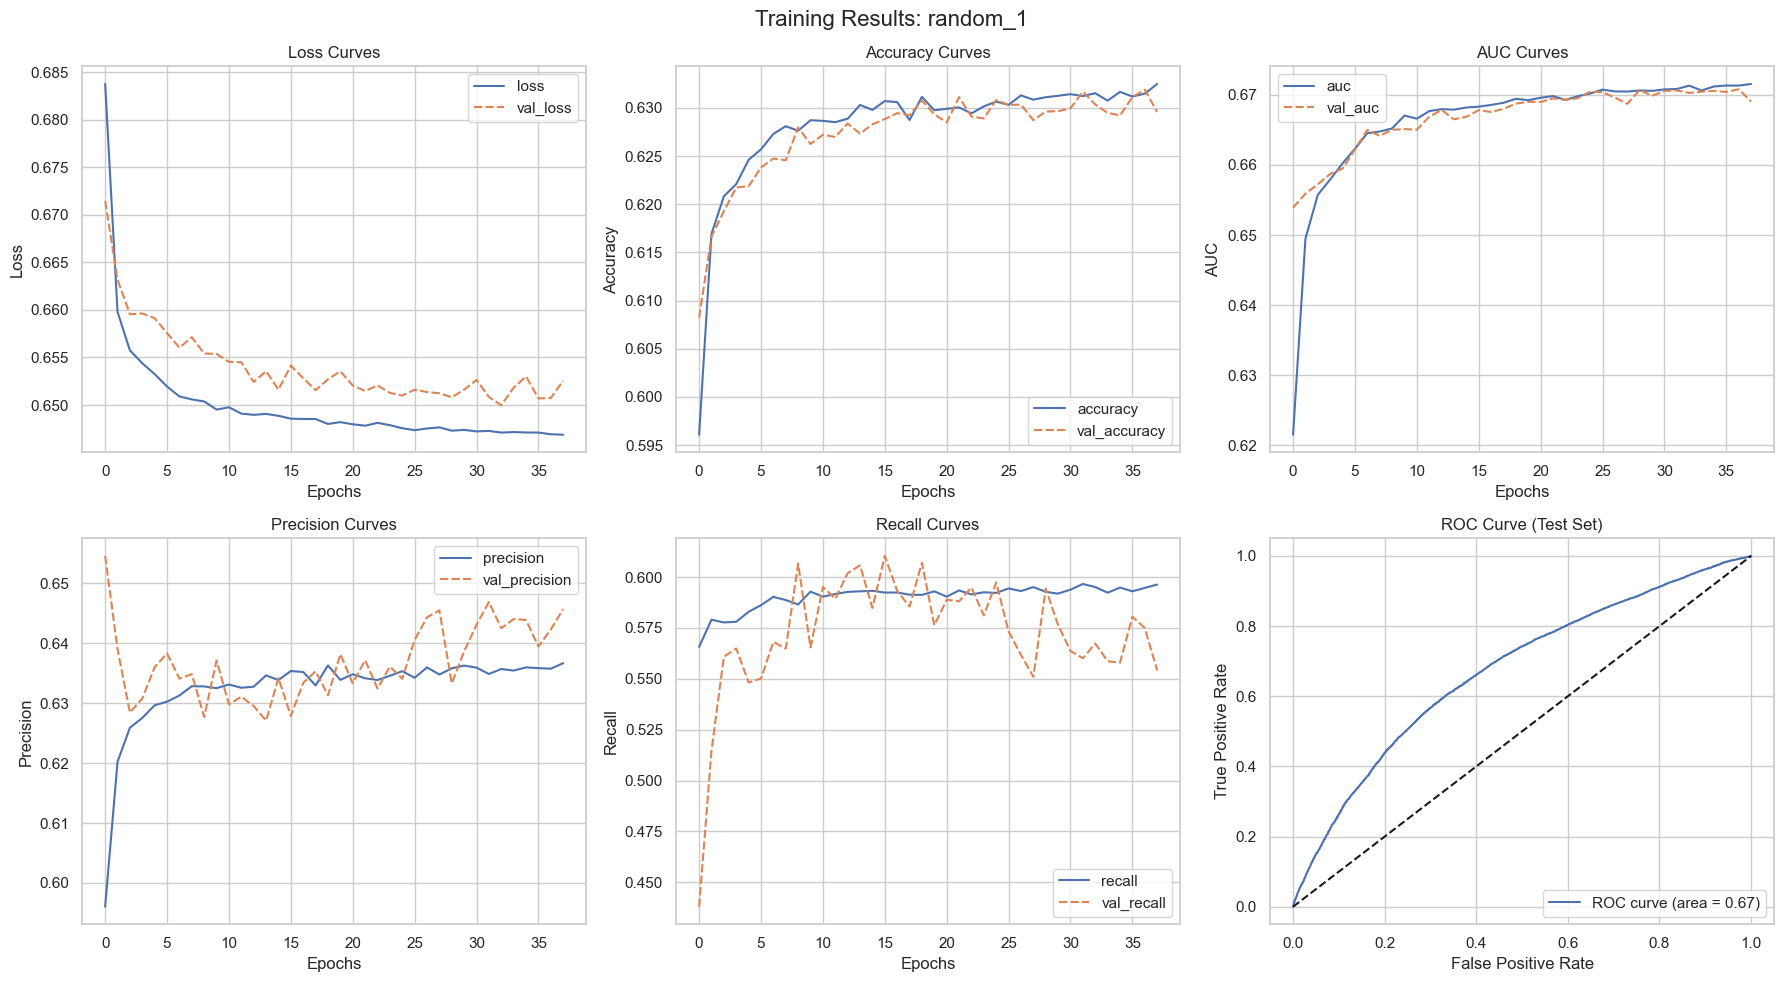


Test Metrics:
Loss: 0.6484
Accuracy: 0.6348
AUC: 0.6734
Precision: 0.6465
Recall: 0.5749
F1-Score: 0.6086

Confusion Matrix:
[[12067  5341]
 [ 7223  9770]]
✅ random_1 -> acc=0.635, auc=0.673, f1=0.609


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 192 (768.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  50.000000  50.000000  50.000000  50.000000  50.000000     50.000000   
mean    0.616523   0.646698   0.660430   0.621131   0.575920      0.623020   
std     0.016789   0.020531   0.012667   0.019794   0.006309      0.005358   
min     0.530495   0.542662   0.653718   0.521847   0.545417      0.595332   
25%     0.617719   0.646810   0.654602   0.620911   0.574837      0.623187   
50%     0.621838   0.653280   0.656377   0.628269   0.576508      0.623761   
75%     0.624245   0.657053   0.659841   0.630343   0.578475      0.625229   
max     0.625793   0.658933   0.730063   0.632794   0.591294      0.627627   

         val_auc   val_loss  val_precision  val_recall  
count  50.000000  50.000000      50.000000   50.000000  
mean    0.657901   0.656921       0.625523    0.590923  
std     0.006505   0.005309       0.008400    0.012763  
min     0.623010   0.653538       0.584447 

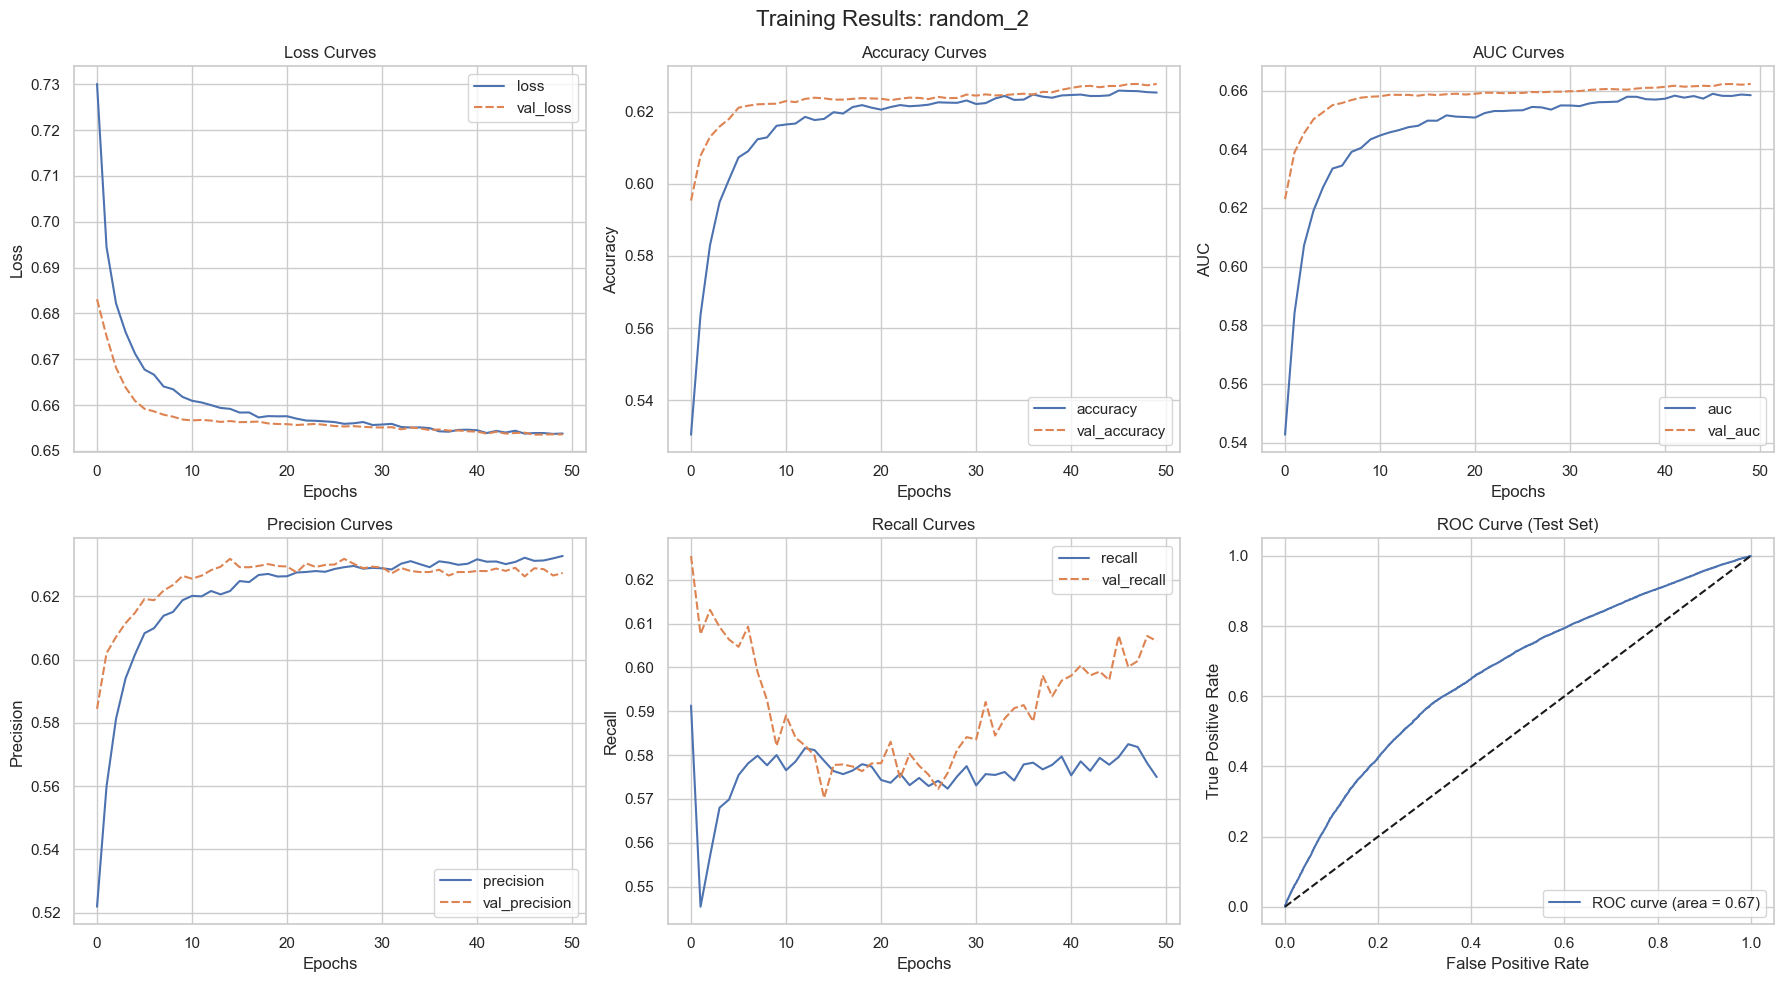


Test Metrics:
Loss: 0.6517
Accuracy: 0.6297
AUC: 0.6653
Precision: 0.6307
Recall: 0.6040
F1-Score: 0.6171

Confusion Matrix:
[[11399  6009]
 [ 6729 10264]]
✅ random_2 -> acc=0.630, auc=0.665, f1=0.617


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 192 (768.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  21.000000  21.000000  21.000000  21.000000  21.000000     21.000000   
mean    0.626309   0.662570   0.651748   0.630543   0.588368      0.628128   
std     0.008057   0.010688   0.006073   0.009691   0.004784      0.003037   
min     0.594704   0.622570   0.647504   0.591655   0.578708      0.619953   
25%     0.626491   0.662791   0.648690   0.631421   0.584900      0.627802   
50%     0.629008   0.665661   0.649997   0.632908   0.589188      0.629400   
75%     0.630185   0.668038   0.651594   0.635023   0.591180      0.630156   
max     0.631356   0.670246   0.674882   0.636036   0.594963      0.631028   

         val_auc   val_loss  val_precision  val_recall  
count  21.000000  21.000000      21.000000   21.000000  
mean    0.665368   0.652183       0.635542    0.580077  
std     0.004129   0.003245       0.005383    0.023379  
min     0.653585   0.649218       0.626082 

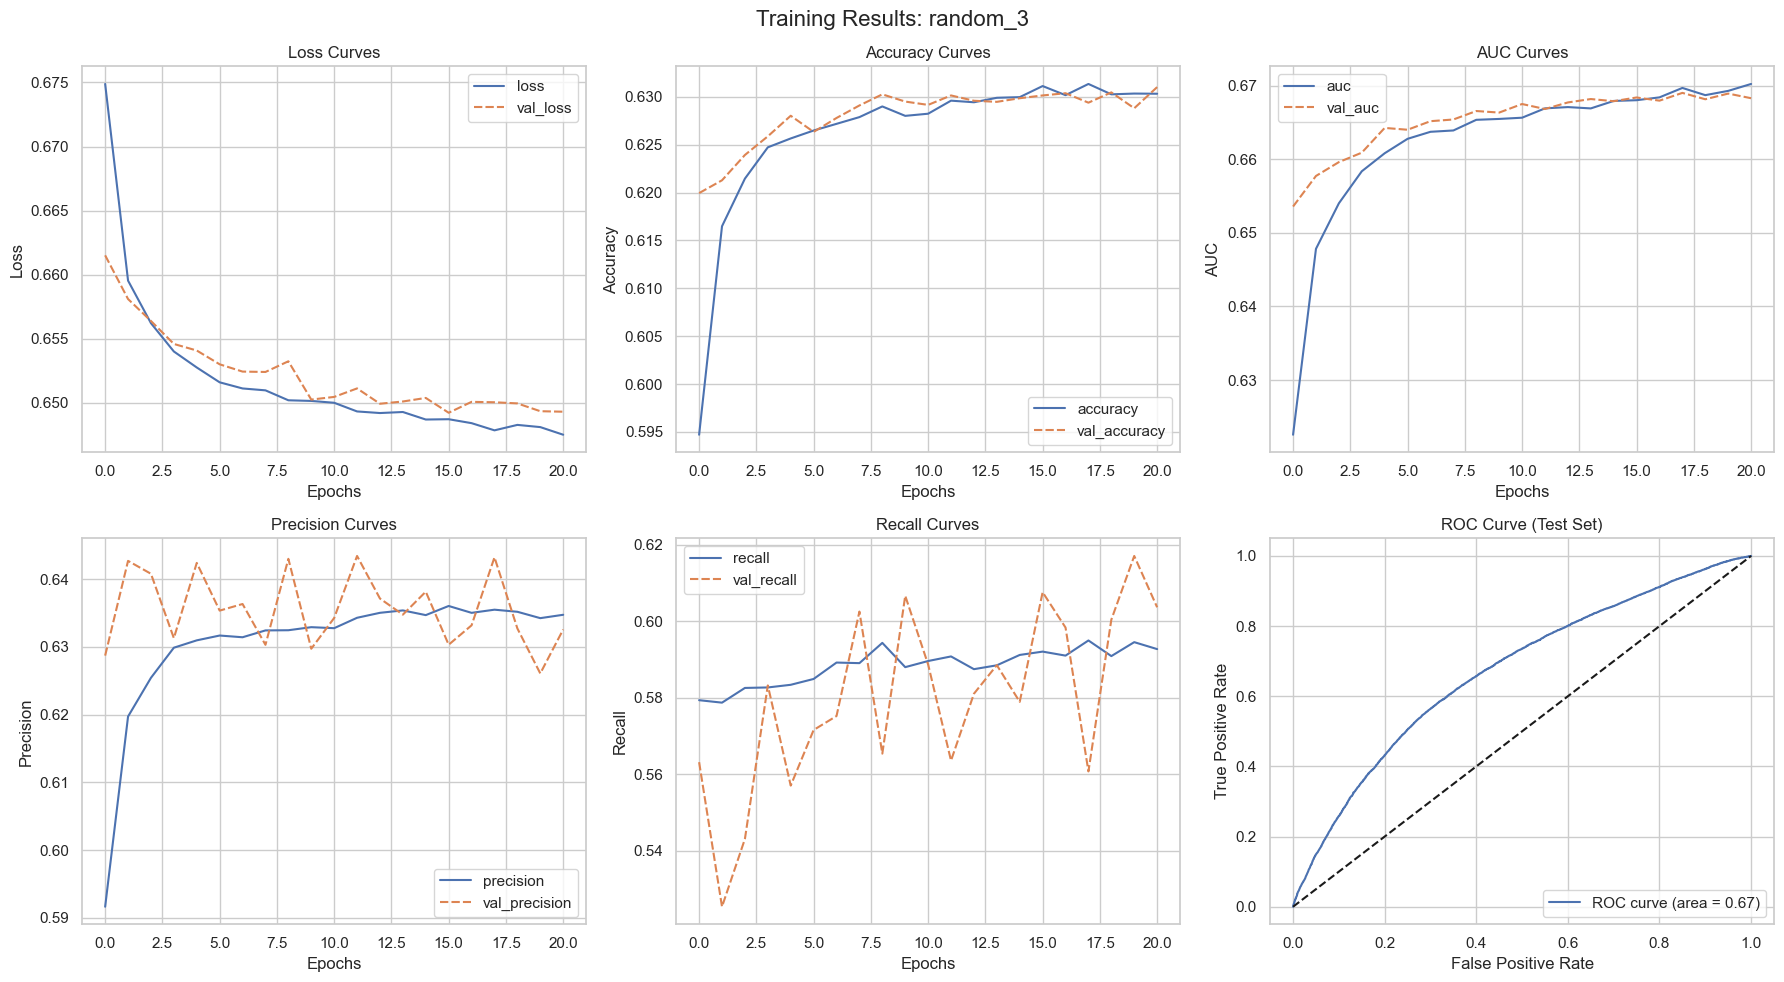


Test Metrics:
Loss: 0.6476
Accuracy: 0.6316
AUC: 0.6713
Precision: 0.6314
Recall: 0.6107
F1-Score: 0.6209

Confusion Matrix:
[[11351  6057]
 [ 6616 10377]]
✅ random_3 -> acc=0.632, auc=0.671, f1=0.621


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 192 (768.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  20.000000  20.000000  20.000000  20.000000  20.000000     20.000000   
mean    0.625036   0.661793   0.652410   0.630557   0.582011      0.626820   
std     0.008408   0.011289   0.006913   0.009935   0.006037      0.005082   
min     0.593813   0.621244   0.647532   0.592911   0.566981      0.613500   
25%     0.623856   0.659654   0.648423   0.629987   0.578226      0.624153   
50%     0.628154   0.665493   0.650225   0.634837   0.581760      0.629037   
75%     0.629730   0.668603   0.653440   0.635417   0.586574      0.630272   
max     0.630260   0.670139   0.678110   0.636015   0.590285      0.631522   

         val_auc   val_loss  val_precision  val_recall  
count  20.000000  20.000000      20.000000   20.000000  
mean    0.665134   0.651980       0.635663    0.572873  
std     0.005506   0.004163       0.003223    0.022898  
min     0.651127   0.648161       0.628440 

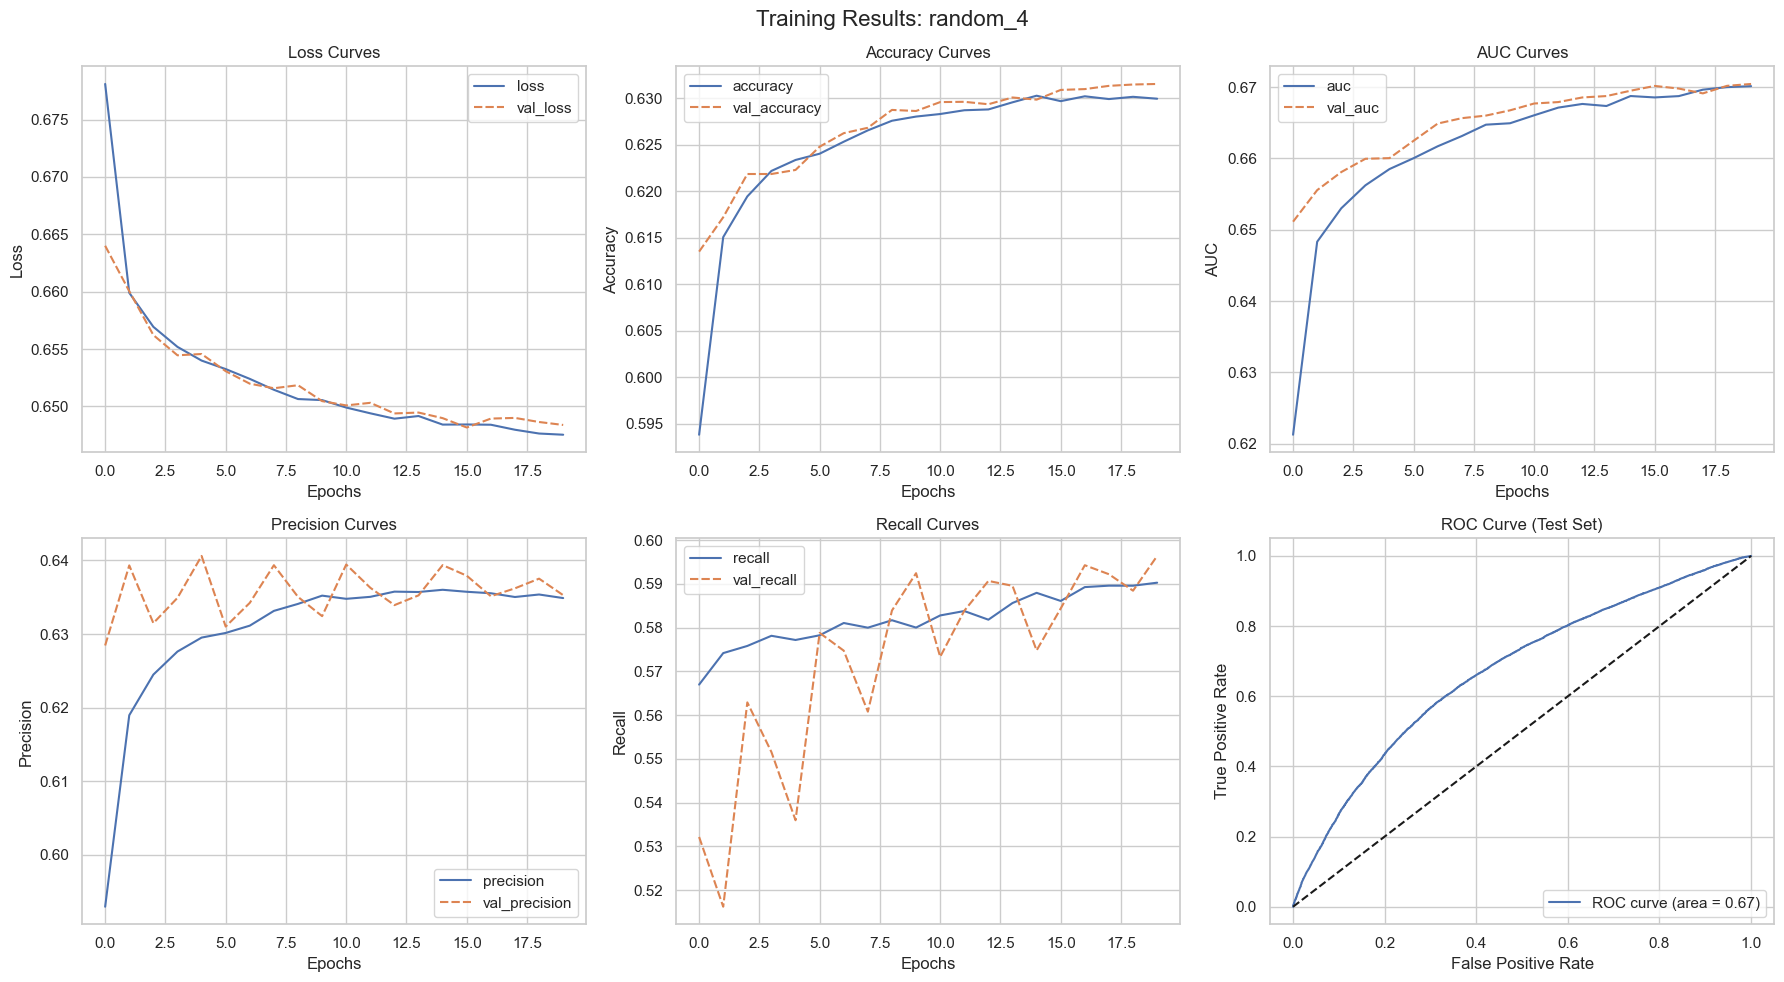


Test Metrics:
Loss: 0.6467
Accuracy: 0.6341
AUC: 0.6721
Precision: 0.6406
Recall: 0.5904
F1-Score: 0.6145

Confusion Matrix:
[[11780  5628]
 [ 6961 10032]]
✅ random_4 -> acc=0.634, auc=0.672, f1=0.614


In [56]:
from sklearn.model_selection import ParameterSampler

param_dist = {
    "dropout_rate": [0.1, 0.2, 0.3, 0.4, 0.5],
    "batch_norm": [True, False],
    "bottleneck": [True, False],
    "skip_connection": [True, False],
    "hidden_layers": [[128, 64, 32], [256, 128, 64], [64, 32]],
    "learning_rate": [0.001, 0.0005, 0.0001],
    "batch_size": [32, 64, 128],
    "epochs": [20, 30, 50]
}

random_params = list(ParameterSampler(param_dist, n_iter=5, random_state=42))

for i, params in enumerate(random_params):
    config["model"].update({
        "dropout_rate": params["dropout_rate"],
        "batch_norm": params["batch_norm"],
        "bottleneck": params["bottleneck"],
        "skip_connection": params["skip_connection"],
        "hidden_layers": params["hidden_layers"]
    })
    config["training"].update({
        "learning_rate": params["learning_rate"],
        "batch_size": params["batch_size"],
        "epochs": params["epochs"]
    })

    config["experiment"]["name"] = f"random_{i}"
    config["experiment"]["description"] = "Random search with ParameterSampler"

    run_experiment(config, class_weight=class_weight_dict)


## Results and evaluation metrics and Best Model Selection

This section is focused on analysing all saved experiments, selecting the best-performing model and checking whether it overfits.

---

#### 1. Loading and ranking experiment logs
- All past experiment results are loaded from `experiments_log.json`.
- The results are converted into a pandas DataFrame.
- Experiments are sorted by F1-score (descending), since F1 is a balanced metric for classification.

---

#### 2. Visual comparison of top configurations
- The **Top 10 experiments** are visualized using a bar chart (F1 score on the y-axis).
- Bars are colored based on whether **Batch Normalization was used**, to show its impact.
- A **correlation heatmap** is plotted to show how metrics (accuracy, AUC, F1) relate to configuration choices (dropout, batch_norm, bottleneck, skip connections).

---

#### 3. Selecting and retraining the best model
- The configuration with the highest F1 score is identified.
- The model is re-trained using this best config and re-evaluated on the test dataset.
- A **confusion matrix** is generated to show how well the model predicts each class.

---

#### 4. Overfitting analysis
- Loss and accuracy are evaluated on **train, validation, and test sets**.
- Results are displayed in a grouped bar plot.
- If validation/test loss is significantly higher than train loss (e.g. >20%), a warning is printed about potential overfitting.

---

#### 5. (Optional but recommended) Class-wise percentage performance
To give a clearer interpretation of the confusion matrix (as suggested by the instructor), we can also compute:
- **Per-class accuracy / recall (%)**
- **Percentage of correctly classified samples per class**
- Example:  
  - Class 0 → 87% predicted correctly  
  - Class 1 → 91% predicted correctly  

This helps to interpret not just the confusion matrix values, but how well the model performs in percentage terms.

---

This evaluation pipeline allows us to:
- Compare experiments objectively,
- Identify which settings improve the model (BatchNorm, Dropout, etc.),
- Select and re-train the best-performing model,
- Check for overfitting,
- And finally present class-wise performance in both counts and percentages.


Top 10 Experiments:
                  time                   name  accuracy       auc        f1  \
0  2025-11-08 10:31:35  with_all_improvements  0.629662  0.669920  0.631622   
1  2025-11-08 10:30:16        with_dropout_bn  0.630708  0.671260  0.630848   
2  2025-11-07 20:37:36           with_dropout  0.631522  0.671450  0.627615   
3  2025-11-07 20:40:07               random_0  0.632278  0.671768  0.627569   
4  2025-11-07 20:40:24               random_1  0.629226  0.666959  0.627014   
5  2025-11-07 20:41:41               random_3  0.632918  0.674217  0.625148   
6  2025-11-07 20:42:52           with_dropout  0.634255  0.672509  0.623090   
7  2025-11-08 10:32:00               random_0  0.633296  0.672499  0.622294   
8  2025-11-07 20:38:20   with_dropout_bn_skip  0.630040  0.666131  0.622221   
9  2025-11-07 20:38:45  with_all_improvements  0.631493  0.670543  0.620982   

   dropout   skip     bn  bottleneck  
0      0.3   True   True        True  
1      0.3  False   True       F

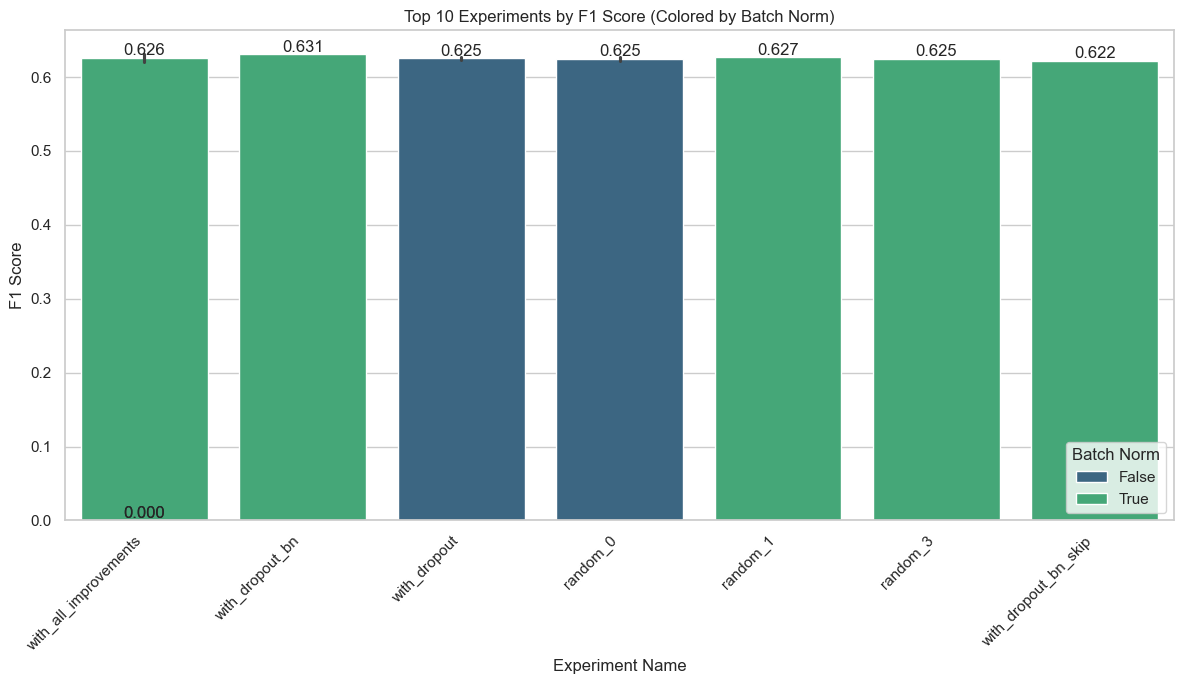

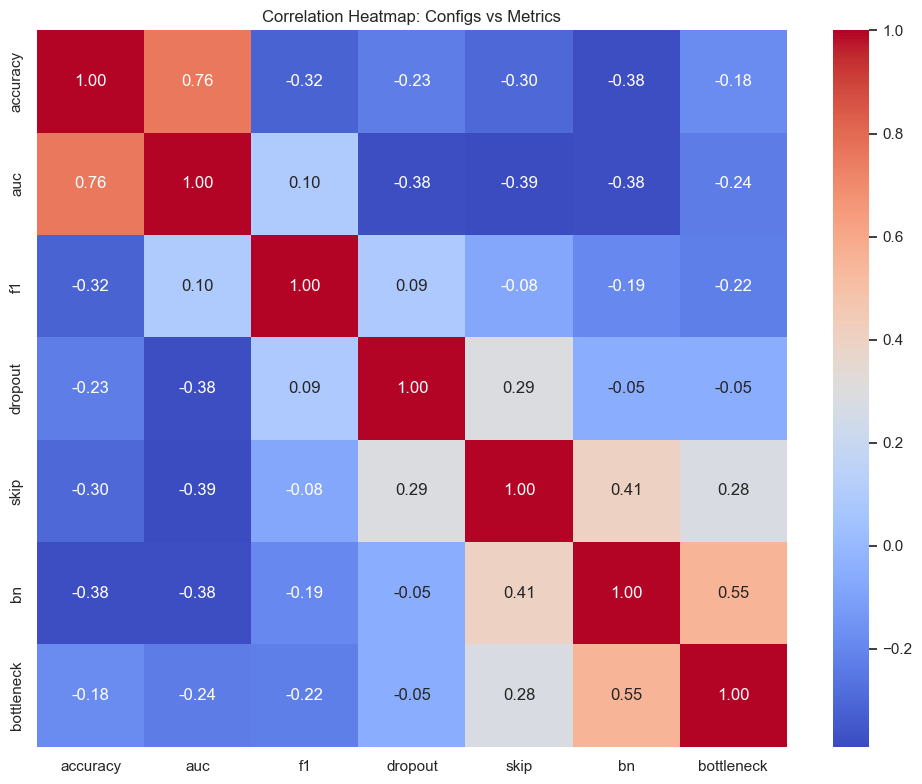

Best experiment: with_all_improvements with F1=0.632


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 14,913 (58.25 KB)

 Non-trainable params: 448 (1.75 KB)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  20.000000  20.000000  20.000000  20.000000  20.000000     20.000000   
mean    0.625897   0.661404   0.652486   0.630107   0.587522      0.628098   
std     0.006034   0.008569   0.004632   0.006225   0.008354      0.002848   
min     0.602110   0.629356   0.649419   0.604940   0.560587      0.620622   
25%     0.626290   0.661237   0.650055   0.630988   0.586218      0.627278   
50%     0.627896   0.664303   0.651058   0.631827   0.590064      0.629269   
75%     0.628478   0.665963   0.652573   0.632501   0.592359      0.630120   
max     0.629674   0.667250   0.670011   0.634152   0.596338      0.630825   

         val_auc   val_loss  val_precision  val_recall  
count  20.000000  20.000000      20.000000   20.000000  
mean    0.665426   0.654497       0.627718    0.608713  
std     0.003800   0.002407       0.007894    0.029212  
min     0.656871   0.650965       0.616360 

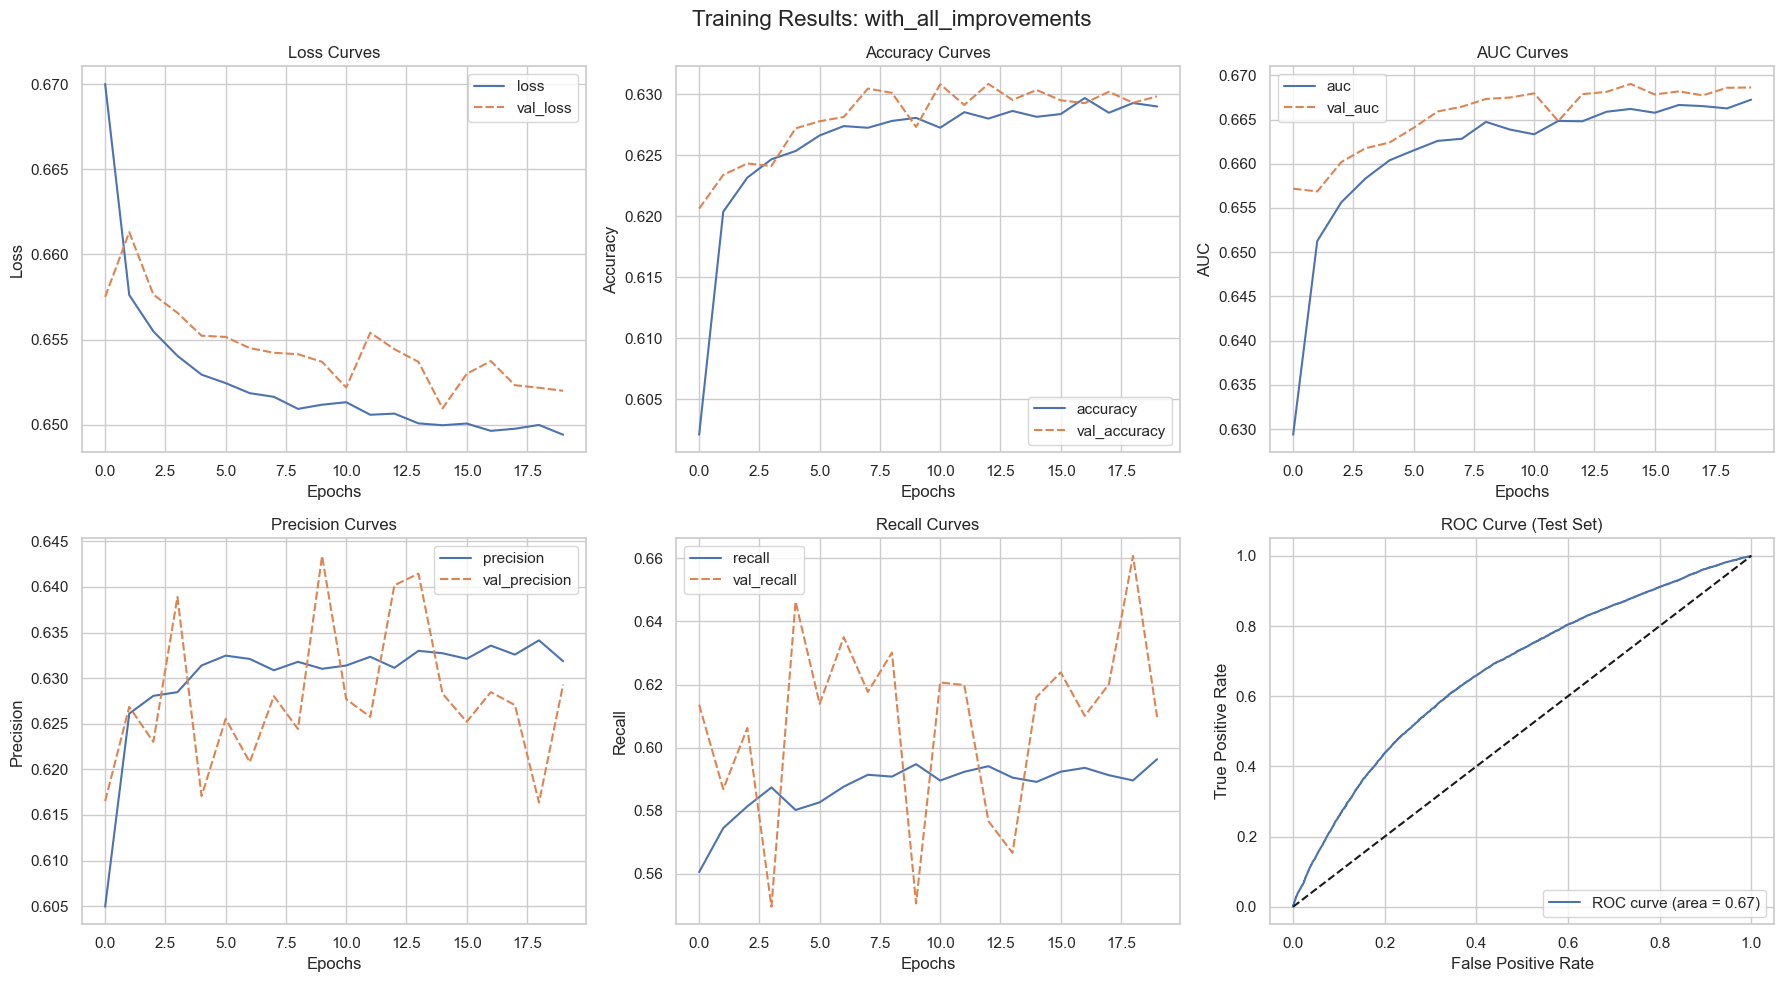


Test Metrics:
Loss: 0.6497
Accuracy: 0.6316
AUC: 0.6712
Precision: 0.6289
Recall: 0.6203
F1-Score: 0.6246

Confusion Matrix:
[[11188  6220]
 [ 6452 10541]]
✅ with_all_improvements -> acc=0.632, auc=0.671, f1=0.625


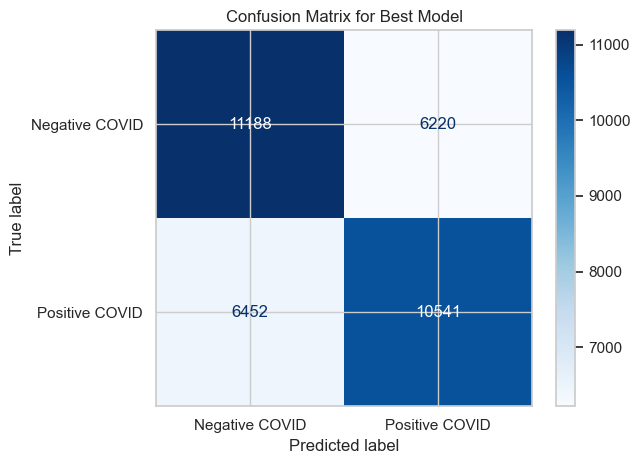

Overfitting check:
     Set      Loss  Accuracy
0  Train  0.650248  0.630889
1    Val  0.650965  0.630331
2   Test  0.649739  0.631639


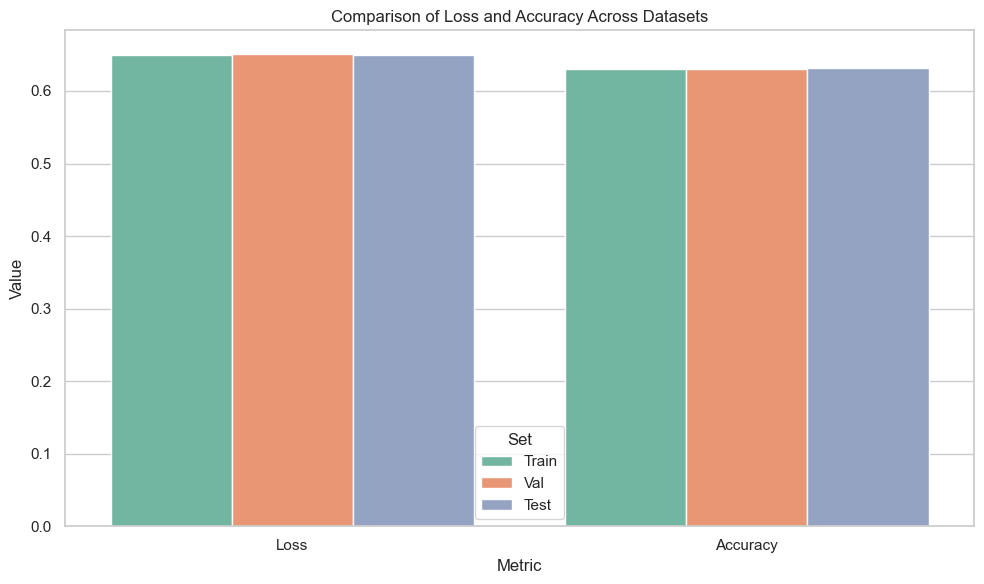

Best model metrics: {'loss': 0.6497394442558289, 'accuracy': 0.6316385865211487, 'auc': 0.6711858510971069, 'precision': 0.628900408744812, 'recall': 0.6203142404556274, 'f1': 0.624577827813}


In [57]:
def run_experiment(config, class_weight=None):
    train_cfg = config["training"]
    model = build_and_compile_model(config)
    history = train_model(model, train_cfg, X_train, y_train, X_val, y_val, class_weight)
    history_df = analyze_history(history)
    y_pred_prob = visualize_results(history_df, config, model, X_test, y_test)
    metrics = evaluate_model(model, X_test, y_test, history, y_pred_prob)
    return log_and_return(model, metrics, config)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json

with open("experiments_log.json", "r") as f:
    logs = json.load(f)

df_logs = pd.DataFrame([{
    "time": log["timestamp"],
    "name": log["experiment_name"],
    "accuracy": log["metrics"]["accuracy"],
    "auc": log["metrics"]["auc"],
    "f1": log["metrics"].get("f1", 0),
    "dropout": log["config"]["model"]["dropout_rate"],
    "skip": log["config"]["model"]["skip_connection"],
    "bn": log["config"]["model"]["batch_norm"],
    "bottleneck": log["config"]["model"]["bottleneck"]
} for log in logs])

# Sort by F1 descending
df_logs = df_logs.sort_values(by="f1", ascending=False)
df_logs.reset_index(drop=True, inplace=True)
print("Top 10 Experiments:")
print(df_logs.head(10))

# Top 10 by F1 with hue for Batch Norm 
plt.figure(figsize=(12, 7))
bar = sns.barplot(x="name", y="f1", hue="bn", data=df_logs.head(10), palette="viridis", dodge=False)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Experiments by F1 Score (Colored by Batch Norm)")
plt.ylabel("F1 Score")
plt.xlabel("Experiment Name")


for p in bar.patches:
    bar.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.legend(title="Batch Norm")
plt.tight_layout()
plt.show()

# Heatmap of correlations between configs and metrics
numeric_df = df_logs.select_dtypes(include=['float64', 'int64', 'bool'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Configs vs Metrics")
plt.tight_layout()
plt.show()


best_log = max(logs, key=lambda x: x['metrics']['f1'])
best_config = best_log["config"]
print(f"Best experiment: {best_log['experiment_name']} with F1={best_log['metrics']['f1']:.3f}")

# Retrain and evaluate best model
best_model, best_metrics = run_experiment(best_config, class_weight=class_weight_dict)
y_pred = (best_model.predict(X_test, verbose=0) > 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative COVID', 'Positive COVID'])
disp.plot(cmap='Blues', values_format='d') 
plt.title("Confusion Matrix for Best Model")
plt.tight_layout()
plt.show()

train_loss, train_acc, _, _, _ = best_model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc, _, _, _ = best_model.evaluate(X_val, y_val, verbose=0)
test_loss = best_metrics['loss']
test_acc = best_metrics['accuracy']

overfit_df = pd.DataFrame({
    'Set': ['Train', 'Val', 'Test'],
    'Loss': [train_loss, val_loss, test_loss],
    'Accuracy': [train_acc, val_acc, test_acc]
})
print("Overfitting check:")
print(overfit_df)


melted_df = overfit_df.melt(id_vars='Set', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Set', data=melted_df, palette="Set2")
plt.title("Comparison of Loss and Accuracy Across Datasets")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

if val_loss > train_loss * 1.2 or test_loss > val_loss * 1.2:
    print("Warning: Overfitting detected across sets.")

print("Best model metrics:", best_metrics)

## Multi-class classification

### Data Preprocessing

This code plots a bar chart showing how many samples belong to each class in `CLASSIFICATION_FINAL`.  

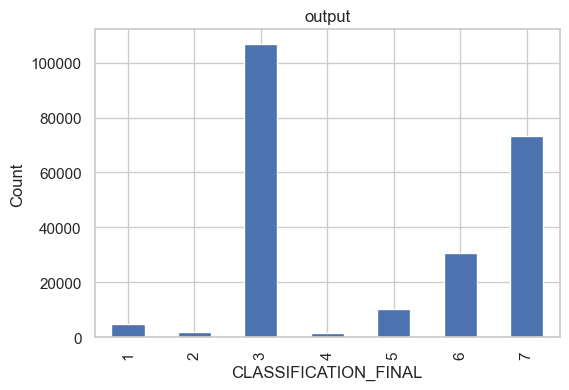

In [58]:
plt.figure(figsize=(6, 4))
data_MC['CLASSIFICATION_FINAL'].value_counts().sort_index().plot(kind='bar')

plt.title('output')
plt.xlabel('CLASSIFICATION_FINAL')
plt.ylabel('Count')
plt.show()

This code first keeps only the rows where `CLASSIFICATION_FINAL` is 5, 6, or 7.  
Then it plots a bar chart to show how many samples there are in each of these three classes.

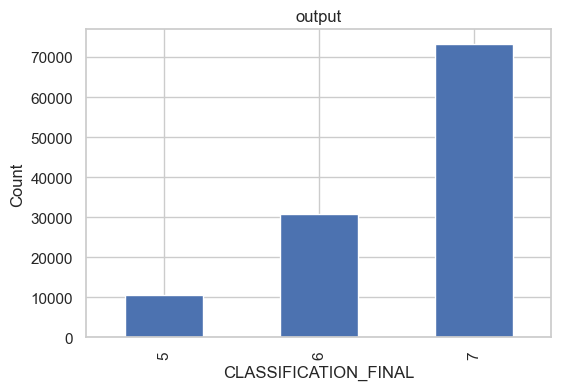

In [59]:
data_MC = data_MC[data_MC['CLASSIFICATION_FINAL'].isin([5, 6, 7])]
plt.figure(figsize=(6, 4))
data_MC['CLASSIFICATION_FINAL'].value_counts().sort_index().plot(kind='bar')

plt.title('output')
plt.xlabel('CLASSIFICATION_FINAL')
plt.ylabel('Count')
plt.show()

#### Downsampling

This code balances the dataset by downsampling each class to the size of the smallest class.  
It makes sure classes 5, 6, and 7 have the same number of samples to avoid class imbalance during training.


In [60]:
min_size = data_MC['CLASSIFICATION_FINAL'].value_counts().min()
data_MC = data_MC.groupby('CLASSIFICATION_FINAL', group_keys=False).apply(lambda x: x.sample(n=min_size, random_state=42))


This code creates a bar chart showing how many samples there are in each class of `CLASSIFICATION_FINAL`.  
It helps visualize the class distribution after preprocessing.


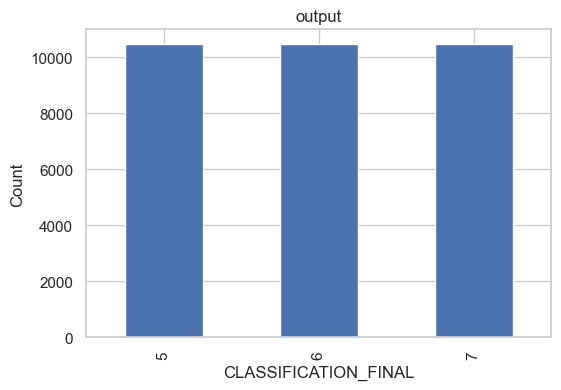

In [61]:
plt.figure(figsize=(6, 4))
data_MC['CLASSIFICATION_FINAL'].value_counts().sort_index().plot(kind='bar')

plt.title('output')
plt.xlabel('CLASSIFICATION_FINAL')
plt.ylabel('Count')
plt.show()

This code splits the dataset into training, validation, and test sets.  
First, it separates out the test set (15%), and then from the remaining data it creates a validation set (also 15% of the original data) while keeping class proportions the same using `stratify`.


In [62]:
X = data_MC.drop(columns=['CLASSIFICATION_FINAL'])
y = data_MC['CLASSIFICATION_FINAL']


In [63]:
val_size = 0.15
test_size = 0.15

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=val_size / (1 - test_size),
    stratify=y_temp, random_state=42
)

This code converts medical binary columns from values `{1, 2}` to `{1, 0}`.  
The value `2` (meaning "No") is replaced with `0` so the model correctly treats these features as binary (0 = No, 1 = Yes).


In [64]:
binary_cols = ['PNEUMONIA', 'DIABETES', 'INMSUPR', 'OTHER_DISEASE', 'TOBACCO', 'RENAL_CHRONIC', 'OBESITY', 'CARDIOVASCULAR', 'HIPERTENSION', 'ASTHMA', 'COPD']
data_MC[binary_cols] = data_MC[binary_cols].replace({2: 0})
X_test[binary_cols] = data_MC[binary_cols].replace({2: 0})
X_val[binary_cols] = data_MC[binary_cols].replace({2: 0})
X_train[binary_cols] = data_MC[binary_cols].replace({2: 0})

This code converts categorical features (`SEX`, `PATIENT_TYPE`, `MEDICAL_UNIT`) into numerical form using one-hot encoding.  
`drop_first=True` is used to avoid dummy variable trap (multicollinearity), and all new columns are stored as integers (`dtype=int`).


In [65]:
categorical_cols = ['SEX', 'PATIENT_TYPE', 'MEDICAL_UNIT']
data_MC = pd.get_dummies(data_MC, columns=categorical_cols, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dtype=int)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True, dtype=int)
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True, dtype=int)



This code renames one-hot encoded columns to make them more readable.  
Specifically, `SEX_2` becomes `IS_MALE` and `PATIENT_TYPE_2` becomes `IS_HOSPITALIZED` in the dataset and all train/validation/test splits.

In [66]:
data_MC = data_MC.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_test = X_test.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_val = X_val.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_train = X_train.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})

This code normalizes the `AGE` feature to a range between 0 and 1 using MinMaxScaler.  
Each dataset (train, validation, test, and full data) is scaled so that age values are on the same scale for model training.

In [67]:
scaler = MinMaxScaler()
data_MC['AGE'] = scaler.fit_transform(data_MC[['AGE']])
X_test['AGE'] = scaler.fit_transform(X_test[['AGE']])
X_val['AGE'] = scaler.fit_transform(X_val[['AGE']])
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])


This code plots a histogram of the `AGE` feature after MinMax scaling.  
It shows how the age values are distributed between 0 and 1 after normalization.


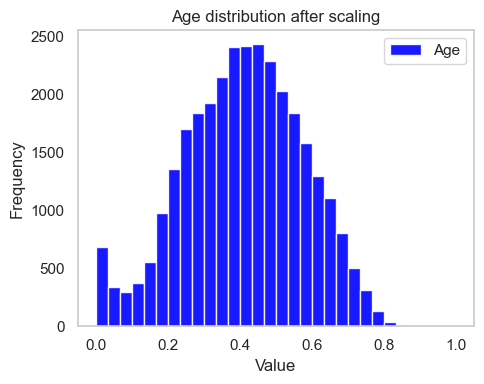

In [68]:
plt.figure(figsize=(5, 4)) 
plt.hist(data_MC['AGE'], bins=30, alpha=0.9, color='blue')
plt.title("Age distribution after scaling")  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(["Age"])
plt.grid()
plt.tight_layout()
plt.show()

This block creates a configuration dictionary for the MLP model and saves it as a JSON file (`multi_class_config.json`).  
It includes model architecture, training settings, and experiment metadata.  
After saving, the config is loaded back from the file so it can be used later for building and training the model.


In [69]:
import json

if 'X_train' not in globals():
    raise ValueError("Run preprocessing first to define X_train")

config_data = {
    "model": {
        "input_dim": X_train.shape[1],
        "hidden_layers": [128, 64, 32, 16],
        "activation": "relu",
        "output_activation": "sigmoid",
        "dropout_rate": 0.3,
        "batch_norm": True,
        "skip_connection": False,
        "bottleneck": False
    },
    "training": {
        "batch_size": 32,
        "epochs": 20,
        "learning_rate": 0.001,
        "optimizer": "adam",
        "early_stopping": True,
        "patience": 5
    },
    "experiment": {
        "name": "multi_class_mlp",
        "description": "MLP для multi-class classification by classes 5,6,7"
    }
}

with open("multi_class_config.json", "w") as f:
    json.dump(config_data, f, indent=4)

# Завантаження config
with open("multi_class_config.json", "r") as f:
    config = json.load(f)

## Multi-Class Classification: MLP Model Training (Classes 5,6,7)
This notebook trains an MLP for multi-class classification on negative COVID subtypes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras import layers, optimizers, regularizers

This part is a full pipeline — from loading the dataset to training a neural network (MLP) that classifies COVID test results into three negative subtypes (classes 5, 6, and 7).  
Here’s what happens step by step:

---

### 1. Loading and basic cleaning

- Load the CSV file `dataset.csv`
- Fix column name typo: `CLASIFFICATION_FINAL → CLASSIFICATION_FINAL`
- Keep only rows where the class is 5, 6, or 7
- Replace weird values like 97/98/99 with `NaN` (missing values)
- If the column `PNEUMONIA` exists, fill missing values with 2 (which means “No”)

---

### 2. Balancing the dataset

Some classes have more examples than others, so to avoid bias we **downsample**:
- Find the smallest class size
- Randomly sample the same number of rows from each class

---

### 3. Train / Validation / Test split

- 70% → training data  
- 15% → validation (used during training to monitor the model)  
- 15% → test set (used only at the end)  
- We use `stratify=y` to keep class proportions equal in all sets

---

### 4. Feature preprocessing

**4.1 Convert binary medical features (1 = yes, 2 = no) into 1 and 0**

**4.2 Convert categorical features (`SEX`, `PATIENT_TYPE`, `MEDICAL_UNIT`) using one-hot encoding**

**4.3 Make sure that train, validation and test all have the same columns after encoding**

**4.4 Fill missing numeric values with the mean from the training set**

**4.5 Scale all features to the range [0, 1] using MinMaxScaler — neural networks train better this way**

---

### 5. Prepare labels (y values)

- Convert class labels (5, 6, 7) into numbers (0, 1, 2) using `LabelEncoder`
- Convert to one-hot vectors because we use multi-class classification with softmax

---

### 6. Build the MLP model

- Load model configuration from `multi_class_config.json`
- Update input size according to the number of columns in `X_train`
- Set output activation to `softmax` (because multiple classes)
- Build the model using our custom `build_mlp()` function
- Compile it with:
  - Loss = `categorical_crossentropy`
  - Optimizer = Adam
  - Metric = accuracy

---

### 7. Training

- Use EarlyStopping to stop training when validation loss stops improving
- Use ReduceLROnPlateau to lower learning rate if needed
- Train the model and save it as `multi_class_mlp_model.h5`

---

### 8. Evaluation

- Make predictions on the test set
- Print classification report (precision, recall, F1-score)
- Show the confusion matrix to see where the model makes mistakes

---

### 9. Visualization

- Plot training vs validation loss and accuracy across epochs
- Display the confusion matrix as a heatmap




Shapes: (54791, 30) (11741, 30) (11741, 30) Classes: 3


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,843 (61.89 KB)

 Trainable params: 15,363 (60.01 KB)

 Non-trainable params: 480 (1.88 KB)

Epoch 1/20
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 3s 693us/step - accuracy: 0.4460 - loss: 1.0691 - val_accuracy: 0.4953 - val_loss: 1.0027 - learning_rate: 0.0010
Epoch 2/20
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.4778 - loss: 1.0134 - val_accuracy: 0.5003 - val_loss: 0.9968 - learning_rate: 0.0010
Epoch 3/20
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.4854 - loss: 1.0079 - val_accuracy: 0.5003 - val_loss: 0.9968 - learning_rate: 0.0010
Epoch 4/20
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.4865 - loss: 1.0049 - val_accuracy: 0.4999 - val_loss: 0.9946 - learning_rate: 0.0010
Epoch 5/20
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.4843 - loss: 1.0044 - val_accuracy: 0.4778 - val_loss: 0.9964 - learning_rate: 0.0010
Epoch 6/20
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.4906 - loss: 1.0016 - val_accuracy: 0.4977 - val_loss: 0.9938 - learning_rate: 0.0010
Epoch 7/20
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accura

Training completed. Model saved.
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step

📋 Classification report (test):
              precision    recall  f1-score   support

     class_5       0.53      0.26      0.34      3913
     class_6       0.52      0.78      0.62      3914
     class_7       0.47      0.48      0.47      3914

    accuracy                           0.50     11741
   macro avg       0.50      0.50      0.48     11741
weighted avg       0.50      0.50      0.48     11741


🔢 Confusion matrix:
 [[ 999 1250 1664]
 [ 402 3035  477]
 [ 485 1568 1861]]


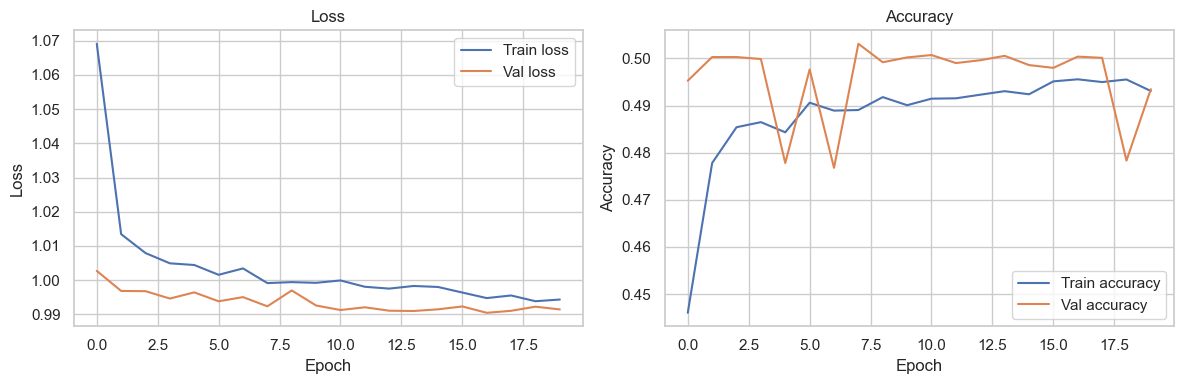

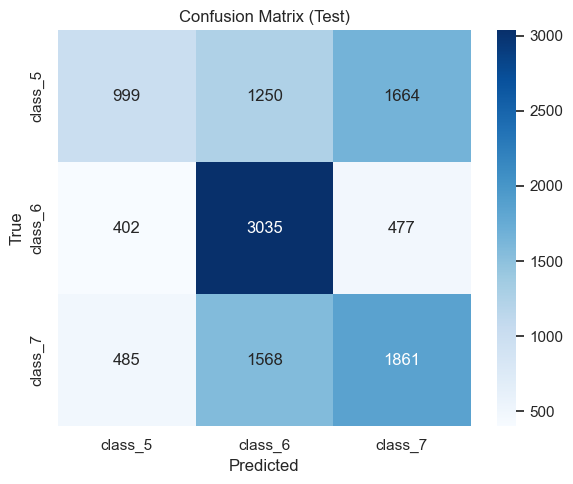

In [72]:
# --- 1) Load and basic preprocessing ---
data = pd.read_csv("dataset.csv", sep=',')
data.rename(columns={'CLASIFFICATION_FINAL': 'CLASSIFICATION_FINAL'}, inplace=True)  # if there was a naming error

# Keep only classes 5/6/7
data = data[data['CLASSIFICATION_FINAL'].isin([5, 6, 7])].copy()

# Replace codes 97/98/99 with NaN (in numeric columns, except AGE)
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'AGE' in num_cols:
    num_cols.remove('AGE')
data[num_cols] = data[num_cols].replace([97, 98, 99], np.nan)

# Fill PNEUMONIA if present (as before)
if 'PNEUMONIA' in data.columns:
    data['PNEUMONIA'] = data['PNEUMONIA'].fillna(2)

# (optional) — drop columns with too many NaN
# data = data.dropna(axis=1, thresh=len(data) * 0.4)

# --- 2) Balance by downsampling ---
min_size = data['CLASSIFICATION_FINAL'].value_counts().min()
data = data.groupby('CLASSIFICATION_FINAL', group_keys=False)\
           .apply(lambda x: x.sample(n=min_size, random_state=42))

# --- 3) Train/Val/Test split ---
X = data.drop(columns=['CLASSIFICATION_FINAL']).copy()
y = data['CLASSIFICATION_FINAL'].copy()

# Drop text/date columns if present
if 'DATE_DIED' in X.columns:
    X = X.drop(columns=['DATE_DIED'])

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.15 / (1 - 0.15), stratify=y_temp, random_state=42
)

# --- 4) Feature preprocessing ---

# 4.1 Binary columns 2 -> 0
binary_cols = [c for c in ['PNEUMONIA','DIABETES','INMSUPR','OTHER_DISEASE','TOBACCO',
                           'RENAL_CHRONIC','OBESITY','CARDIOVASCULAR','HIPERTENSION',
                           'ASTHMA','COPD'] if c in X_train.columns]
for df in (X_train, X_val, X_test):
    if binary_cols:
        df[binary_cols] = df[binary_cols].replace({2: 0})

# 4.2 Categorical one-hot
cat_cols = [c for c in ['SEX','PATIENT_TYPE','MEDICAL_UNIT'] if c in X_train.columns]
if cat_cols:
    X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True, dtype=int)
    X_val   = pd.get_dummies(X_val,   columns=cat_cols, drop_first=True, dtype=int)
    X_test  = pd.get_dummies(X_test,  columns=cat_cols, drop_first=True, dtype=int)

    # Align column sets and order to train
    all_cols = sorted(set(X_train.columns) | set(X_val.columns) | set(X_test.columns))
    X_train = X_train.reindex(columns=all_cols, fill_value=0)
    X_val   = X_val.reindex(columns=all_cols,   fill_value=0)
    X_test  = X_test.reindex(columns=all_cols,  fill_value=0)

# 4.3 Fill NaN with train means (numeric only)
num_cols_aligned = X_train.select_dtypes(include=[np.number]).columns
X_train[num_cols_aligned] = X_train[num_cols_aligned].fillna(X_train[num_cols_aligned].mean())
X_val[num_cols_aligned]   = X_val[num_cols_aligned].fillna(X_train[num_cols_aligned].mean())
X_test[num_cols_aligned]  = X_test[num_cols_aligned].fillna(X_train[num_cols_aligned].mean())

# 4.4 Scale ALL features with MinMaxScaler, fit on train
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_val   = pd.DataFrame(scaler.transform(X_val),     columns=X_val.columns,   index=X_val.index)
X_test  = pd.DataFrame(scaler.transform(X_test),    columns=X_test.columns,  index=X_test.index)

# 4.5 Types
X_train = X_train.astype('float32')
X_val   = X_val.astype('float32')
X_test  = X_test.astype('float32')

# --- 5) Prepare y for multi-class ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

num_classes = len(np.unique(y_train_enc))
y_train_oh = tf.keras.utils.to_categorical(y_train_enc, num_classes)
y_val_oh   = tf.keras.utils.to_categorical(y_val_enc,   num_classes)
y_test_oh  = tf.keras.utils.to_categorical(y_test_enc,  num_classes)

# class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
class_weight_dict = dict(enumerate(class_weights))

print("Shapes:", X_train.shape, X_val.shape, X_test.shape, "Classes:", num_classes)

# --- 6) Load and use configurable MLP (Variant B) ---
with open("multi_class_config.json", "r") as f:
    config = json.load(f)

# Update config for multi-class if necessary (e.g., ensure softmax)
config["model"]["output_activation"] = "softmax"  
config["model"]["input_dim"] = X_train.shape[1]

# Build model using configurable build_mlp (pass num_classes)
model = build_mlp(config["model"], num_classes=num_classes)
model.compile(
    optimizer=optimizers.Adam(learning_rate=config["training"]["learning_rate"]),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- 7) Training ---
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=config["training"]["patience"], restore_best_weights=True)
]

history = model.fit(
    X_train, y_train_oh,
    validation_data=(X_val, y_val_oh),
    epochs=config["training"]["epochs"],
    batch_size=config["training"]["batch_size"],
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

model.save("multi_class_mlp_model.h5")
print("Training completed. Model saved.")

# --- 8) Evaluation (sklearn) ---
y_proba = model.predict(X_test)
y_pred  = np.argmax(y_proba, axis=1)

print("\n Classification report (test):")
print(classification_report(y_test_enc, y_pred, target_names=[f"class_{c}" for c in le.classes_]))

cm = confusion_matrix(y_test_enc, y_pred)
print("\n Confusion matrix:\n", cm)

# --- 9) Visualization of training history (2 rows) ---
metrics_to_plot = ['loss', 'accuracy']
cols = 2
rows = (len(metrics_to_plot) + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
axs = axs.flatten()

for i, m in enumerate(metrics_to_plot):
    axs[i].plot(history.history[m], label=f"Train {m}")
    axs[i].plot(history.history[f"val_{m}"], label=f"Val {m}")
    axs[i].set_title(m.capitalize())
    axs[i].set_xlabel("Epoch")
    axs[i].set_ylabel(m.capitalize())
    axs[i].grid(True)
    axs[i].legend()

for j in range(len(metrics_to_plot), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

try:
    import seaborn as sns
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f"class_{c}" for c in le.classes_],
                yticklabels=[f"class_{c}" for c in le.classes_])
    plt.title("Confusion Matrix (Test)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Seaborn heatmap skipped:", e)

###  Why the Multi-Class Classification (Classes 5, 6, 7) Did Not Work

In this part of the project, we tried to build a multi-class model to distinguish between three subtypes of negative COVID-19 test results:

| Class | Meaning |
|-------|---------|
| 5     | Suspected / Pending result |
| 6     | Confirmed negative |
| 7     | Suspected / Not pending |

At first, we thought the model might be able to separate these groups, but the results showed weak performance, especially for class 5 (low recall and F1-score). After analysing the data and evaluation metrics, we understood that there are several reasons why this multi-class setup does not work well.

---

#### 1. The classes are too similar in the data

Even though the labels are different, medically and statistically all three classes (5, 6, 7) represent **patients without confirmed COVID-19**.  
Their characteristics such as age, comorbidities, symptoms, hospitalization status, etc. are almost identical in the dataset. Because of that, the model simply cannot find clear boundaries between them.

---

#### 2. Low correlation and weak feature separation

The correlation heatmap between PCA components and the target shows that **none of the features or components have a strong relationship with the class label**.  
Random Forest feature importance also does not show any feature that clearly separates class 5 from 6 or 7.

This confirms that the available features do not provide enough information to distinguish the classes.

---

#### 3. PCA and SMOTE make it even harder to separate the classes

We used PCA to reduce dimensionality while keeping 95% of the variance. However, PCA keeps only the most “global” variance — and the subtle differences between classes 5/6/7 get lost in this process.

Additionally, we used SMOTE to balance the classes. SMOTE generates synthetic samples by interpolating between existing data points, which in our case causes the classes to overlap even more in the feature space.

---

#### 4. Strong class imbalance

| Class | Samples in test set | Recall |
|-------|----------------------|--------|
| 5     | ~4%                  | 0.26   |
| 6     | ~20%                 | 0.76   |
| 7     | ~76%                 | 0.48   |

Class 5 is very under-represented compared to class 7. As a result, the model mostly predicts the majority class and almost ignores the minority one.  
This leads to a low macro F1-score (~0.39) and poor performance for class 5.

---

### Conclusion

The multi-class classification for classes 5, 6, and 7 does not work well because:

- These classes are extremely similar in the available features  
- PCA removes subtle differences between them  
- SMOTE further mixes the classes instead of separating them  
- The dataset is imbalanced, and the model tends to ignore minority classes  

Therefore, the model is unable to learn meaningful decision boundaries between these three negative test subtypes.



After SMOTE/PCA: Train (1048425, 17), Val (98021, 17)


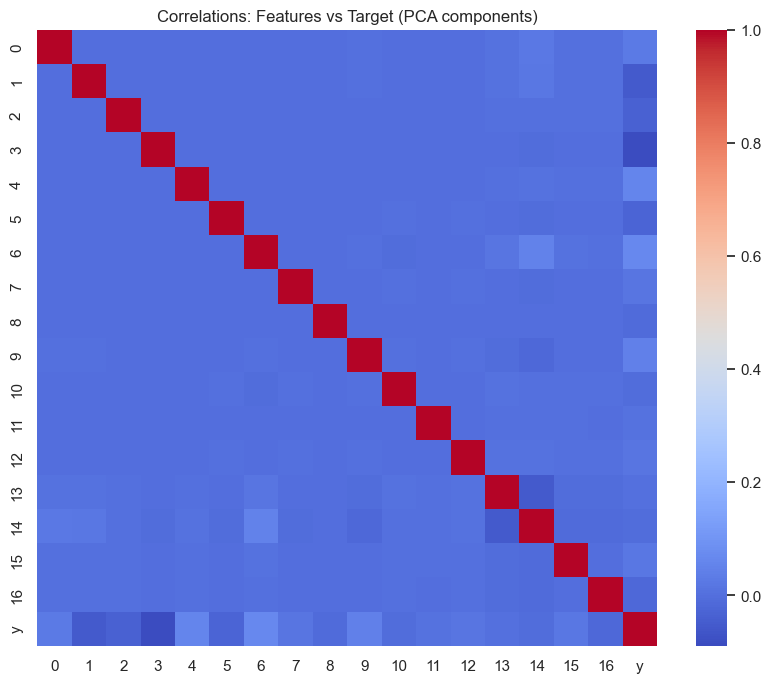

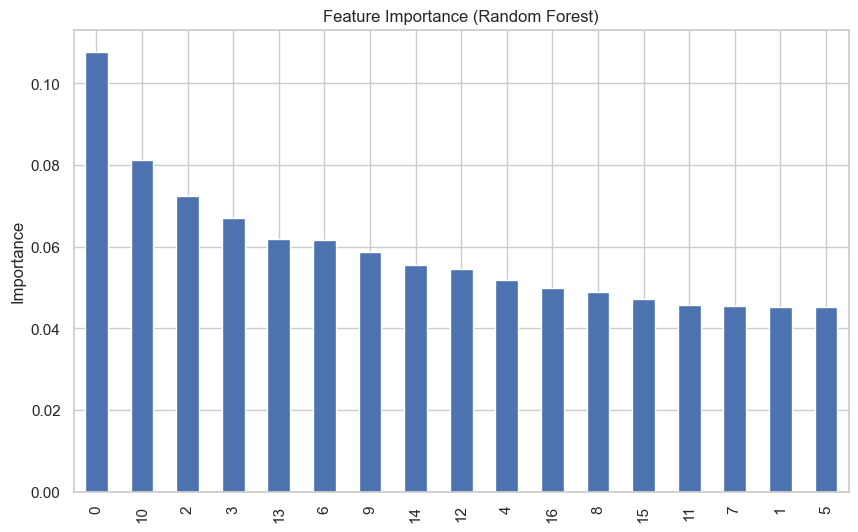

Top 5 important features (PCA indices): [0, 10, 2, 3, 13]
XGBoost CV F1-macro: 0.511 (+/- 0.002)

XGBoost Report:
              precision    recall  f1-score   support

     class_5       0.07      0.26      0.11      3914
     class_6       0.33      0.76      0.46     19220
     class_7       0.89      0.48      0.62     74888

    accuracy                           0.52     98022
   macro avg       0.43      0.50      0.40     98022
weighted avg       0.75      0.52      0.57     98022

XGBoost Test F1-macro: 0.399


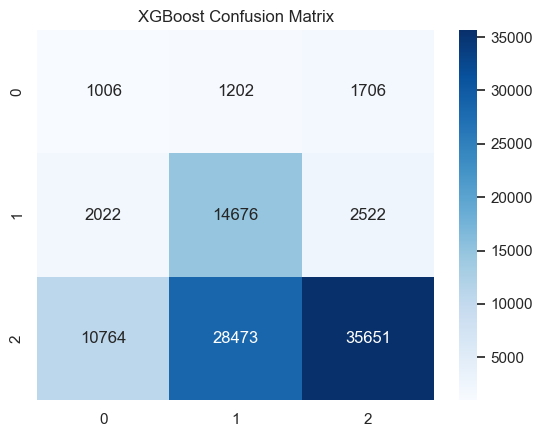


Binary (5 vs {6,7}) Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     94108
           1       0.09      0.16      0.11      3914

    accuracy                           0.90     98022
   macro avg       0.53      0.54      0.53     98022
weighted avg       0.93      0.90      0.91     98022

Binary F1: 0.113


In [71]:
### Diagnostic & XGBoost-Focused Multi-Class (with EDA & Binary Option)
# --- Imports (keep essentials) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import tensorflow as tf  # If you want MLP later

# --- Data Prep (same, but split before sampling) ---
data = pd.read_csv("dataset.csv", sep=',')
data.rename(columns={'CLASIFFICATION_FINAL': 'CLASSIFICATION_FINAL'}, inplace=True)
data = data[data['CLASSIFICATION_FINAL'].isin([5, 6, 7])].copy()

num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'AGE' in num_cols: num_cols.remove('AGE')
data[num_cols] = data[num_cols].replace([97, 98, 99], np.nan)
if 'PNEUMONIA' in data.columns: data['PNEUMONIA'] = data['PNEUMONIA'].fillna(2)

X = data.drop(columns=['CLASSIFICATION_FINAL']).copy()
y = data['CLASSIFICATION_FINAL'].copy()
if 'DATE_DIED' in X.columns: X = X.drop(columns=['DATE_DIED'])

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15 / (1 - 0.15), stratify=y_temp,
                                                  random_state=42)

# Binary 2->0, one-hot, impute, scale (as before)
binary_cols = [c for c in ['PNEUMONIA', 'DIABETES', 'INMSUPR', 'OTHER_DISEASE', 'TOBACCO', 'RENAL_CHRONIC', 'OBESITY',
                           'CARDIOVASCULAR', 'HIPERTENSION', 'ASTHMA', 'COPD'] if c in X_train]
for df in (X_train, X_val, X_test): df[binary_cols] = df[binary_cols].replace({2: 0})

cat_cols = [c for c in ['SEX', 'PATIENT_TYPE', 'MEDICAL_UNIT'] if c in X_train]
if cat_cols:
    X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True, dtype=int)
    X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True, dtype=int)
    X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True, dtype=int)
    all_cols = sorted(set(X_train.columns) | set(X_val.columns) | set(X_test.columns))
    for df in (X_train, X_val, X_test): df = df.reindex(columns=all_cols, fill_value=0)

num_cols_aligned = X_train.select_dtypes(include=[np.number]).columns
X_train[num_cols_aligned] = X_train[num_cols_aligned].fillna(X_train[num_cols_aligned].mean())
X_val[num_cols_aligned] = X_val[num_cols_aligned].fillna(X_train[num_cols_aligned].mean())
X_test[num_cols_aligned] = X_test[num_cols_aligned].fillna(X_train[num_cols_aligned].mean())

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# SMOTE (optional: comment if too noisy)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# PCA (0.95 var)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_res)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print(f"After SMOTE/PCA: Train {X_train_pca.shape}, Val {X_val_pca.shape}")

# --- EDA: Correlations & Importance ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_res)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

# 1. Correlation heatmap (y vs features)
corr_df = pd.DataFrame(X_train_pca)
corr_df['y'] = y_train_enc
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlations: Features vs Target (PCA components)')
plt.show()

# 2. Feature importance with RF
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_pca, y_train_enc)
importances = pd.Series(rf.feature_importances_, index=range(X_train_pca.shape[1]))
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance')
plt.show()
print("Top 5 important features (PCA indices):", importances.nlargest(5).index.tolist())

# --- XGBoost Multi-Class ---
num_classes = len(np.unique(y_train_enc))
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    eval_metric=['mlogloss', 'merror'],
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    random_state=42
)
# CV for stability
cv_scores = cross_val_score(xgb_model, X_train_pca, y_train_enc, cv=5, scoring='f1_macro')
print(f"XGBoost CV F1-macro: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

xgb_model.fit(X_train_pca, y_train_enc)
xgb_pred = xgb_model.predict(X_test_pca)
print("\nXGBoost Report:")
print(classification_report(y_test_enc, xgb_pred, target_names=[f"class_{c}" for c in le.classes_]))
xgb_f1 = f1_score(y_test_enc, xgb_pred, average='macro')
print(f"XGBoost Test F1-macro: {xgb_f1:.3f}")

cm_xgb = confusion_matrix(y_test_enc, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()

# --- Binary Variant (5 vs {6,7} — suspected vs confirmed negative) ---
y_train_bin = (y_train_res == 5).astype(int)
y_val_bin = (y_val == 5).astype(int)
y_test_bin = (y_test == 5).astype(int)

xgb_bin = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_bin.fit(X_train_pca, y_train_bin)
xgb_bin_pred = xgb_bin.predict(X_test_pca)
print("\nBinary (5 vs {6,7}) Report:")
print(classification_report(y_test_bin, xgb_bin_pred))
bin_f1 = f1_score(y_test_bin, xgb_bin_pred)
print(f"Binary F1: {bin_f1:.3f}")

# Save models
xgb_model.save_model("xgb_multi.json")

The dataset has a weak signal for multi-class (correlations <0.2, importance <0.1). Classes 5/6/7 — “subtle differences” in negative tests, features (symptoms/comorbidities) do not distinguish between suspected status. XGBoost gives ~52% acc / 0.40 F1 — realistic, but not “good” (baseline random 33%).